In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt
import matplotlib.pyplot as plt
import talib as ta

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
cannabis = ['ABBV', 'CARA', 'GWPH', 'INSY', 'ZDPY']
prisons = ['CXW', 'GEO']

In [4]:
#start = dt.datetime(2015, 10, 1)
#end = dt.datetime(2017, 1, 1)
#start = dt.datetime(2017, 5, 1)
start = dt.datetime(2012, 8, 1)
stock = data.DataReader('FAST', 'google', start)

In [5]:
print(stock.shape)
print(stock.head())
print(stock.tail())

(1256, 5)
             Open   High    Low  Close   Volume
Date                                           
2012-08-01  43.44  43.62  42.06  42.22  1823548
2012-08-02  41.71  42.87  41.48  42.47  2157323
2012-08-03  43.09  43.31  42.66  43.09  1943550
2012-08-06  43.03  43.19  42.58  42.72  1287731
2012-08-07  43.00  43.76  42.97  43.54  1218897
             Open   High    Low  Close   Volume
Date                                           
2017-07-24  42.35  43.15  42.25  43.03  3647579
2017-07-25  43.40  44.44  43.26  44.08  3825127
2017-07-26  44.22  44.34  43.72  43.89  2698624
2017-07-27  43.62  44.07  43.29  43.80  4680435
2017-07-28  43.72  43.97  43.28  43.55  3129938


In [6]:
def SinglePlot(title, columns):
    stock.plot(y=columns)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()
    
def SinglePlotWithMarker(title, columns):
    stock.plot(y=columns, marker='o', linestyle='')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

def DoublePlotWithOMarker(title, columns1, columns2):
    _, ax = plt.subplots()
    stock.plot(y=columns1, ax=ax)
    stock.plot(y=columns2, marker='o', linestyle='', ax=ax)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()   

def SeparatePlot2(title, columns1, columns2):
    ax1 = plt.subplot(211)
    plt.title(title)
    plt.gca().axes.get_xaxis().set_visible(False)
    stock.plot(y=columns1, ax=ax1)
    plt.legend(loc='upper left')
    ax2 = plt.subplot(212)
    stock.plot(y=columns2, ax=ax2)
    plt.legend(loc='upper left')
    plt.show()

def SeparatePlot3(title, columns1, columns2, columns3):
    ax1 = plt.subplot(2, 1, 1)
    plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
    plt.gca().axes.get_xaxis().set_visible(False)
    stock.plot(y=columns1, ax=ax1)
    plt.legend(loc='upper left')
    ax2 = plt.subplot(2, 1, 2)
    stock.plot(y=columns2, ax=ax2)
    stock.plot(y=columns3, linestyle='--', ax=ax2)
    plt.legend(loc='upper left')
    plt.show()


In [7]:
print(stock['Close'].max())
print(stock['Close'].min())
print(stock['Close'].mean())
print(stock['Close'].std())

53.18
35.5
45.1275955414
3.70784312885


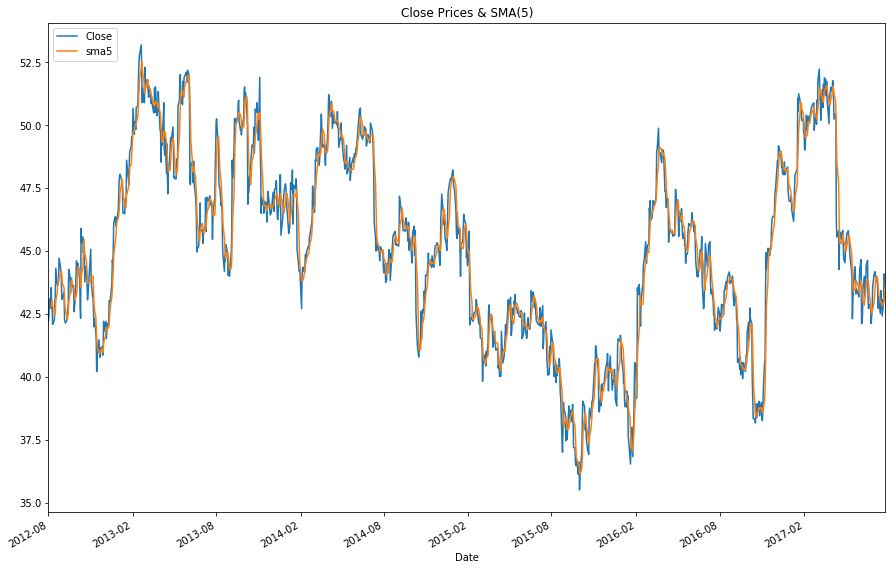

In [8]:
# SMA
stock['sma5'] = ta.SMA(stock['Close'].values, 5)
SinglePlot('Close Prices & SMA(5)', ['Close', 'sma5'])

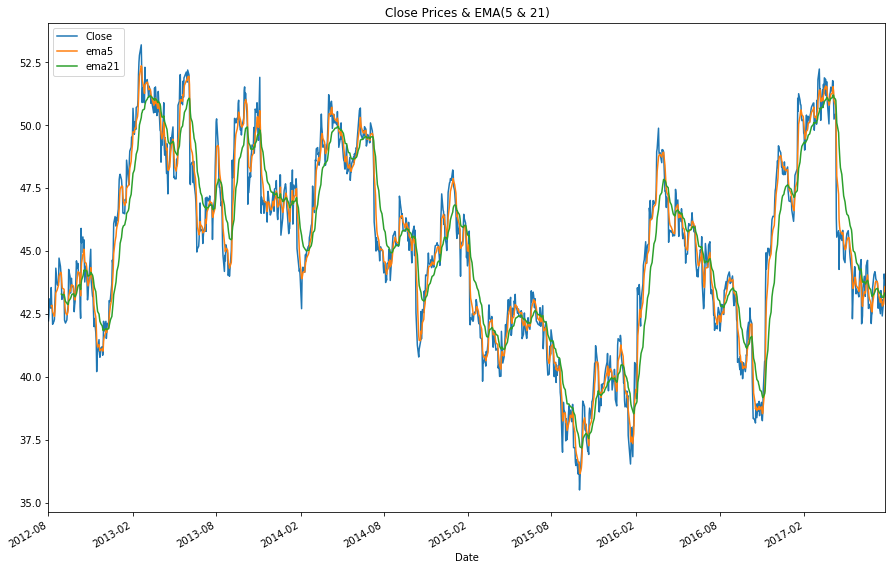

In [9]:
# EMA
stock['ema5'] = ta.EMA(stock['Close'].values, 5)
stock['ema21'] = ta.EMA(stock['Close'].values, 21)
SinglePlot('Close Prices & EMA(5 & 21)', ['Close', 'ema5', 'ema21'])

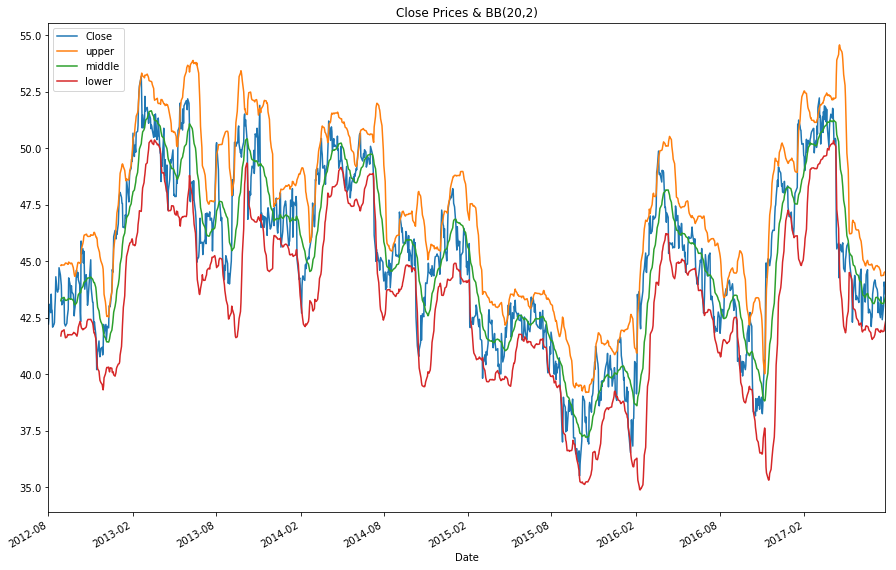

In [10]:
# BBANDS(20,2)
stock['upper'], stock['middle'], stock['lower'] = ta.BBANDS(stock['Close'].values,
                                                            timeperiod=20,
                                                            nbdevup=2,
                                                            nbdevdn=2,
                                                            matype=0)
SinglePlot('Close Prices & BB(20,2)', ['Close', 'upper', 'middle', 'lower'])

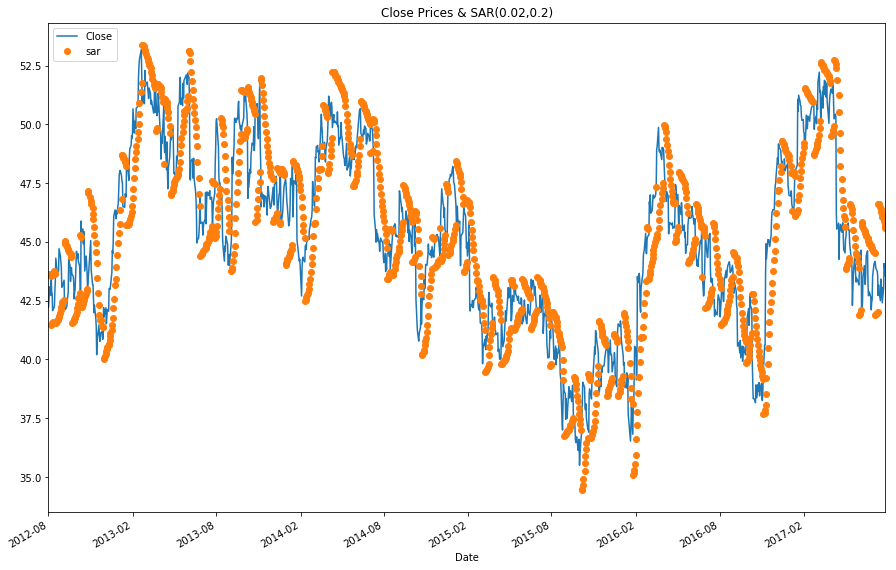

In [11]:
# Parabolic Stop and Reverse SAR(0.02,0.2) (Acceleration Factor Increment, Maximum Acceleration Factor)
stock['sar'] = ta.SAR(stock['High'].values, stock['Low'].values, acceleration=0.02, maximum=0.2)
DoublePlotWithOMarker('Close Prices & SAR(0.02,0.2)', ['Close'], ['sar'])

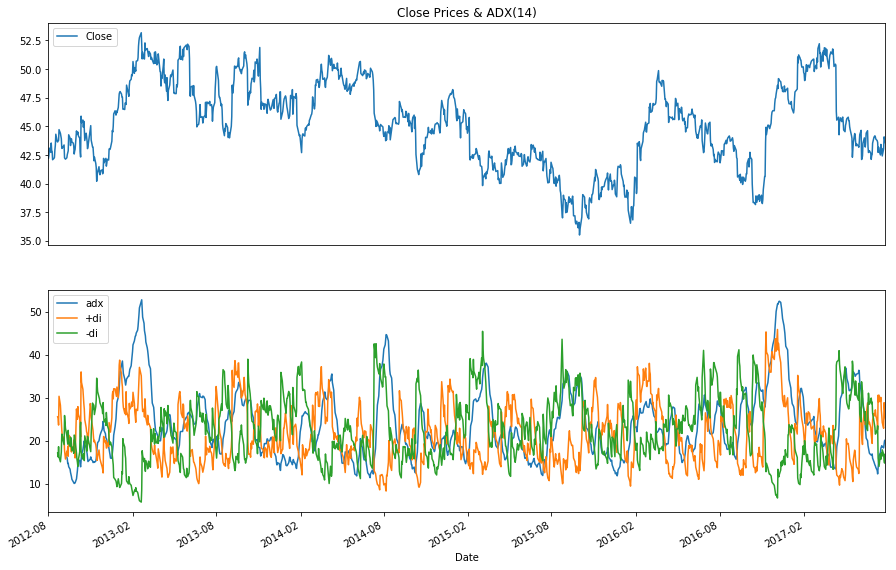

In [12]:
# Average Directional Moving Index, ADX(14)
stock['adx'] = ta.ADX(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)
stock['+di'] = ta.PLUS_DI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)
stock['-di'] = ta.MINUS_DI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)

SeparatePlot2('Close Prices & ADX(14)', ['Close'], ['adx', '+di', '-di'])

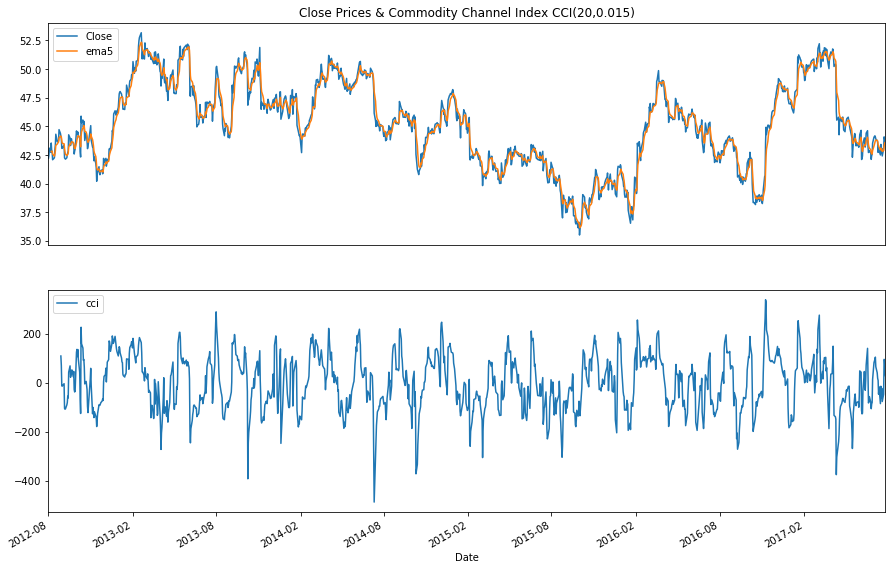

In [13]:
# Commodity Channel Index (20,0.015)
# +100 overbought below -100 oversold
# Warn of extreme conditions
# It is high when prices is too much above the average and too low when prices too below their average
stock['cci'] = ta.CCI(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=20)
SeparatePlot2('Close Prices & Commodity Channel Index CCI(20,0.015)', ['Close', 'ema5'], ['cci'])


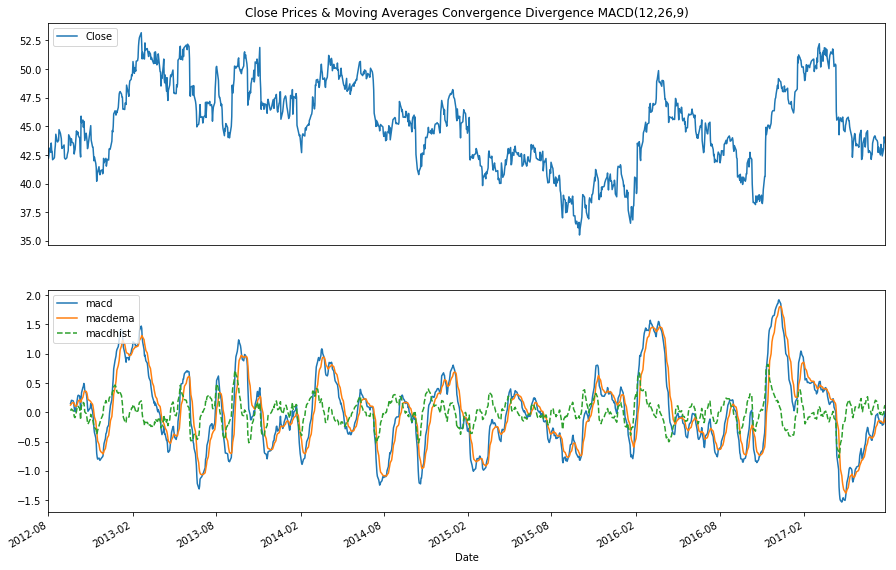

In [14]:
# MACD - Moving Averages Convergence Divergence(12,26,9)
# Strength of a trend by comparing two moving averages
# When the signal line cross overs the MCAD line it is a trading signal
# http://www.tadoc.org/indicator/MACD.htm
# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
# http://www.investopedia.com/articles/technical/082701.asp
stock['macd'], stock['macdema'], stock['macdhist'] = ta.MACD(stock['Close'].values,
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
SeparatePlot3('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)',
              ['Close'], ['macd', 'macdema'], ['macdhist'])


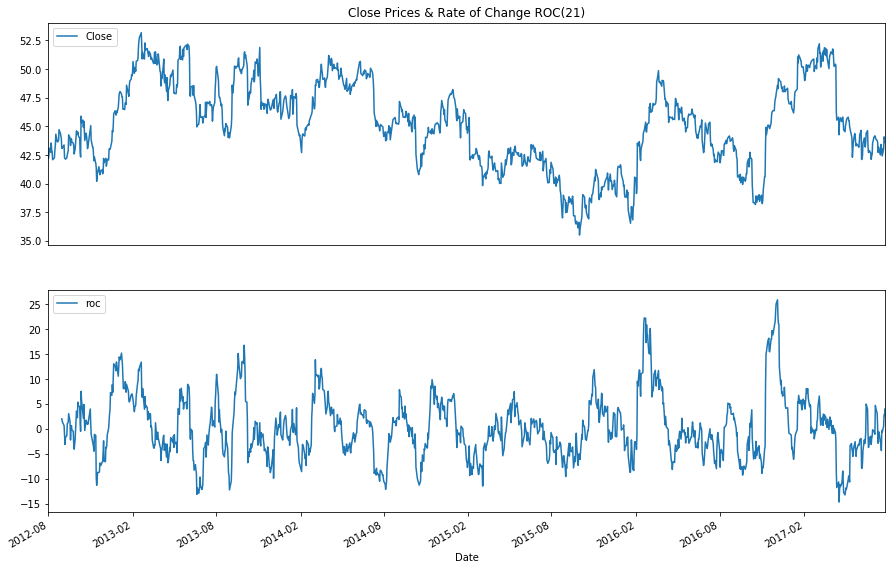

In [15]:
# Rate of Change - ROC(21)
# As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings.
# Prices are rising as long as the Rate-of-Change remains positive.
# Prices are falling when the Rate-of-Change is negative. 
stock['roc'] = ta.ROC(stock['Close'].values, timeperiod=21)
SeparatePlot2('Close Prices & Rate of Change ROC(21)', ['Close'], ['roc'])


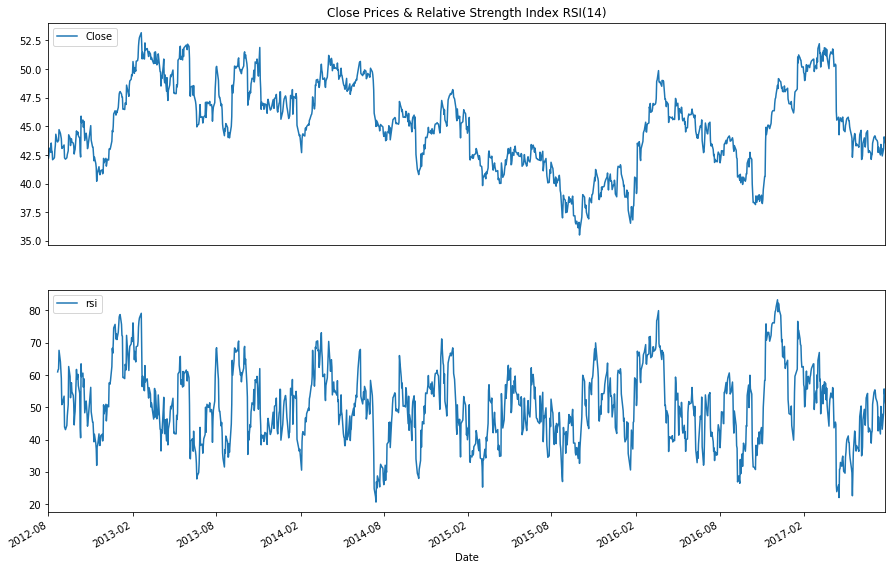

In [16]:
# Relative Strength Index = RSI(14)
# A momentum oscillator that measures the speed and change of price movements. 
# Between 0 and 100
# Overbought when above 70 and oversold when below 30
# http://www.tadoc.org/indicator/RSI.htm
# http://www.investopedia.com/articles/technical/03/070203.asp
stock['rsi'] = ta.RSI(stock['Close'].values, timeperiod=14)
SeparatePlot2('Close Prices & Relative Strength Index RSI(14)', ['Close'], ['rsi'])


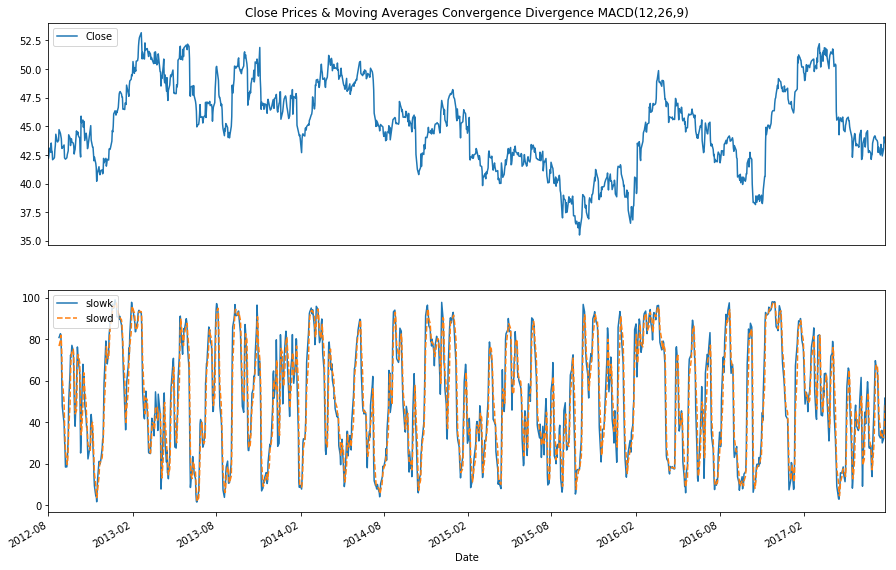

In [17]:
# Stochastic Oscillator Full - STO(14,3,3)
# A momentum indicator
# Changes direction before the price
# slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# http://www.tadoc.org/indicator/STOCH.htm
# https://www.metastock.com/customer/resources/taaz/?p=106
stock['slowk'], stock['slowd'] = ta.STOCH(stock['High'].values, stock['Low'].values, stock['Close'].values,
                                     fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
SeparatePlot3('Close Prices & Stochastic Oscillator Full STO(14,3,3)', ['Close'], ['slowk'], ['slowd'])


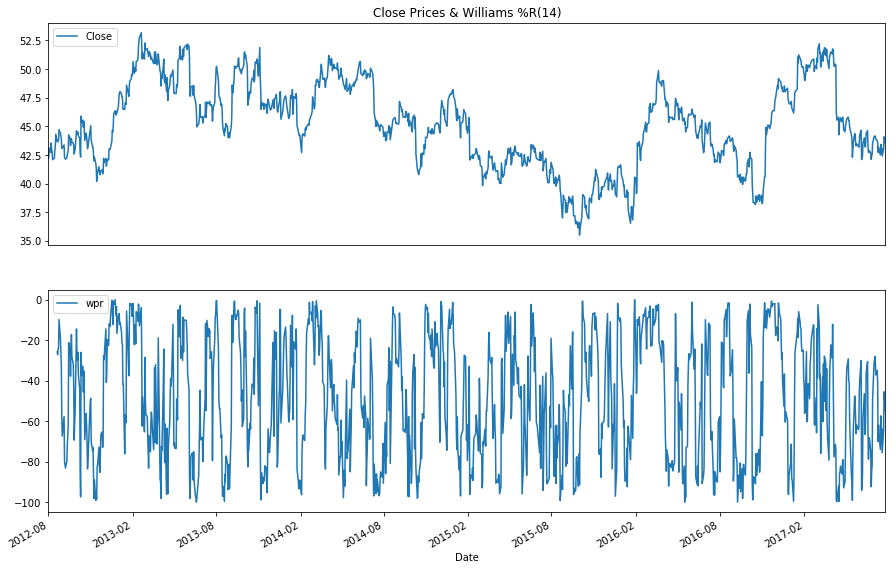

In [18]:
# Williams %R(14)
# Inverse of fast stochastic oscillator
# Fast stochastic oscillator and Willaim %R is the same scaling is different
stock['wpr'] = ta.WILLR(stock['High'].values, stock['Low'].values, stock['Close'].values, timeperiod=14)
SeparatePlot2('Close Prices & Williams %R(14)', ['Close'], ['wpr'])


In [19]:
def PriceCrossoverWithoutTradingCommisions(outputColumn, inputColumn):
    stock[outputColumn] = ((stock['Close'] / stock['Close'].shift(1))-1)*stock[inputColumn]
    stock.ix[0, outputColumn] = 0

In [20]:
def PriceCrossoverWithTradingCommition(shiftedInputColumn, inputColumn, outputColumn, signalColumn, tempColumn):
    stock[shiftedInputColumn] = stock[inputColumn].shift(1)
    stock[tempColumn] = stock[signalColumn]
    sma5tc = 0
    for i, r in enumerate(stock.iterrows()):
        if (r[1][signalColumn] == 1 or r[1][signalColumn] == -1) and r[1][inputColumn] != r[1][shiftedInputColumn]:
            sma5tc = 0.01
        else:
            sma5tc = 0.00
        stock.ix[i, tempColumn] = sma5tc

    stock[outputColumn] = (((stock['Close']/stock['Close'].shift(1))-1)-stock[tempColumn])*stock[inputColumn]
    stock.ix[0, outputColumn] = 0

In [21]:
def CumulativeReturns(crt, crtc, bhcrt, drt, drtc, bhdrt, title):
    stock[crt] = np.cumprod(stock[drt]+1)-1
    stock[crtc] = np.cumprod(stock[drtc]+1)-1
    stock[bhcrt] = np.cumprod(stock[bhdrt]+1)-1

    stock.plot(y=[crt, crtc, bhcrt])
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

In [22]:
def StrategiesPerformanceMetrics(crt, crtc, bhcrt, drt, drtc, bhdrt, colTitle1, colTitle2, colTitle3):
    # Annualized Returns
    sma5yrt = stock.ix[-1, crt]
    sma5yrtc = stock.ix[-1, crtc]
    bhyrt = stock.ix[-1, bhcrt]

    # Annualized Standard Deviation
    sma5std = np.std(stock[drt])*np.sqrt(252)
    sma5stdc = np.std(stock[drtc])*np.sqrt(252)
    bhstd = np.std(stock[bhdrt])*np.sqrt(252)

    # Annualized Sharpe Ratio
    sma5sr = sma5yrt / sma5std
    sma5src = sma5yrtc / sma5stdc
    bhsr = bhyrt / bhstd

    # Summary Results Data Table
    data = [{'0': '', '1': colTitle1, '2': colTitle2, '3': colTitle3},
            {'0': 'Annualized Return', '1': sma5yrt, '2': sma5yrtc, '3': bhyrt},
            {'0': 'Annualized Standard Deviation', '1': sma5std, '2': sma5stdc, '3': bhstd},
            {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': sma5sr, '2': sma5src, '3': bhsr}]
    
    table = pd.DataFrame(data)
    print(table)

In [23]:
def GenerateTradingStrategy(strategyColumn, signalColumn): # Own stock=1 , not own stock=0, no short-selling
    stock[strategyColumn] = 1
    sma5str = 0
    for i, r in enumerate(stock.iterrows()):
        if r[1][signalColumn] == 1:
            sma5str = 1
        elif r[1][signalColumn] == -1:
            sma5str = 0
        else:
            sma5str = stock[strategyColumn][i-1]
        stock.ix[i, strategyColumn] = sma5str

def TradingStrategyChart3(title, col1, col2, col3):
    ax1 = plt.subplot(3, 1, 1)
    plt.title(title)
    plt.gca().axes.get_xaxis().set_visible(False)
    stock.plot(y=[col1], ax=ax1)
    plt.legend(loc='upper left')
    ax2 = plt.subplot(3, 1, 2)
    stock.plot(y=[col2], color='g', ax=ax2)
    plt.legend(loc='upper left')
    plt.gca().axes.get_xaxis().set_visible(False)
    ax3 = plt.subplot(3, 1, 3)
    stock.plot(y=[col3], marker='o', linestyle='', ax=ax3)
    plt.legend(loc='upper left')
    plt.show()


In [24]:
stock['Close(-1)'] = stock['Close'].shift(1)
stock['Close(-2)'] = stock['Close'].shift(2)

In [25]:
# Buy and Hold

# Daily Return
stock['bhdrt'] = (stock['Close']/stock['Close(-1)'])-1
stock.ix[0, 'bhdrt'] = 0

# Cumulative Daily Return
stock['bhcrt'] = np.cumprod(stock['bhdrt']+1)-1

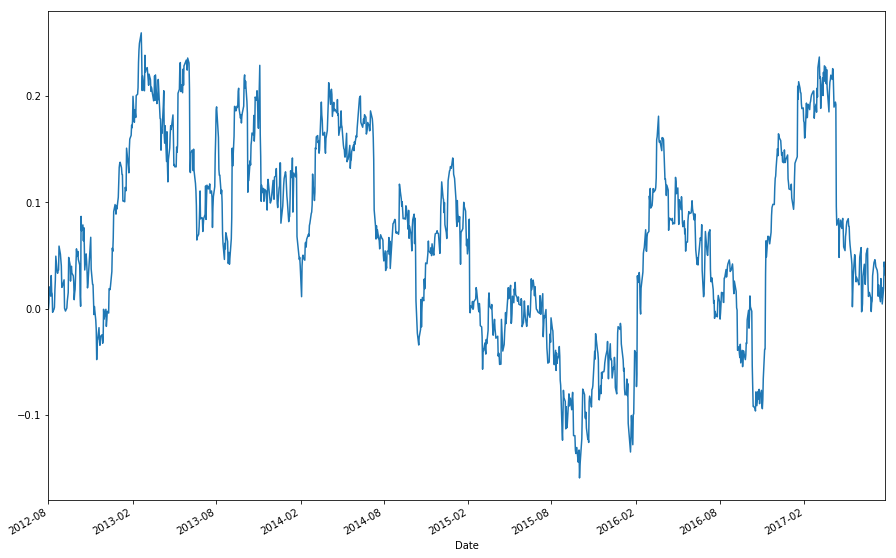

In [26]:
stock['bhcrt'].plot()

In [27]:
# Previous Periods Data (avoid backtesting bias)
stock['sma5(-1)'] = stock['sma5'].shift(1)
stock['sma5(-2)'] = stock['sma5'].shift(2)
stock['ema5(-1)'] = stock['ema5'].shift(1)
stock['ema21(-1)'] = stock['ema21'].shift(1)
stock['ema5(-2)'] = stock['ema5'].shift(2)
stock['ema21(-2)'] = stock['ema21'].shift(2)
stock['lower(-1)'] = stock['lower'].shift(1)
stock['upper(-1)'] = stock['upper'].shift(1)
stock['lower(-2)'] = stock['lower'].shift(2)
stock['upper(-2)'] = stock['upper'].shift(2)
stock['sar(-1)'] = stock['sar'].shift(1)
stock['sar(-2)'] = stock['sar'].shift(2)
stock['adx(-1)'] = stock['adx'].shift(1)
stock['+di(-1)'] = stock['+di'].shift(1)
stock['-di(-1)'] = stock['-di'].shift(1)
stock['+di(-2)'] = stock['+di'].shift(2)
stock['-di(-2)'] = stock['-di'].shift(2)
stock['cci(-1)'] = stock['cci'].shift(1)
stock['cci(-2)'] = stock['cci'].shift(2)
stock['macd(-1)'] = stock['macd'].shift(1)
stock['macdema(-1)'] = stock['macdema'].shift(1)
stock['macd(-2)'] = stock['macd'].shift(2)
stock['macdema(-2)'] = stock['macdema'].shift(2)
stock['roc(-1)'] = stock['roc'].shift(1)
stock['roc(-2)'] = stock['roc'].shift(2)
stock['rsi(-1)'] = stock['rsi'].shift(1)
stock['rsi(-2)'] = stock['rsi'].shift(2)
stock['slowd(-1)'] = stock['slowd'].shift(1)
stock['slowd(-2)'] = stock['slowd'].shift(2)
stock['wpr(-1)'] = stock['wpr'].shift(1)
stock['wpr(-2)'] = stock['wpr'].shift(2)

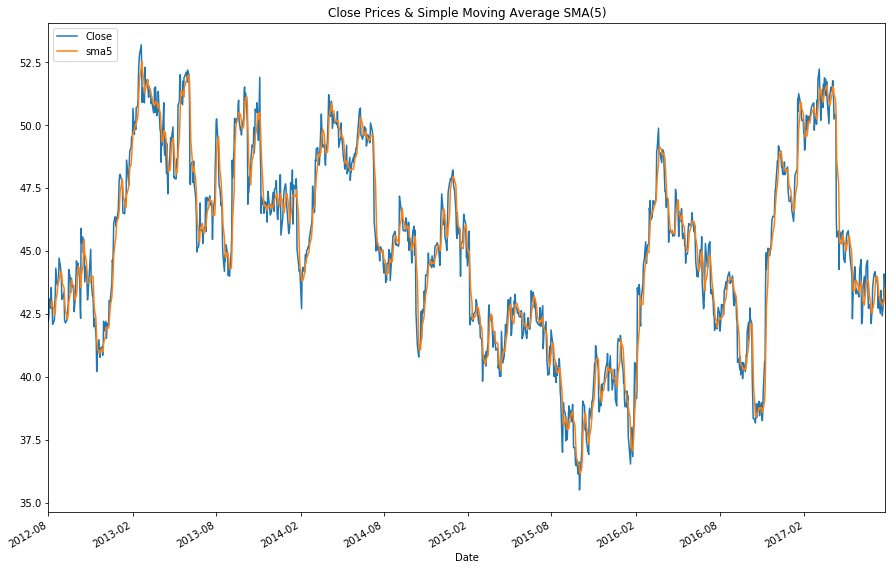

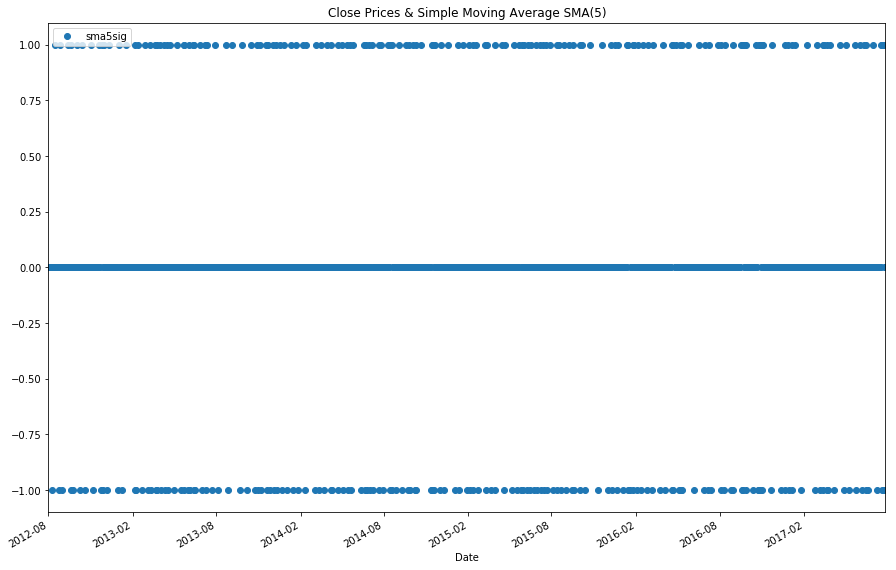

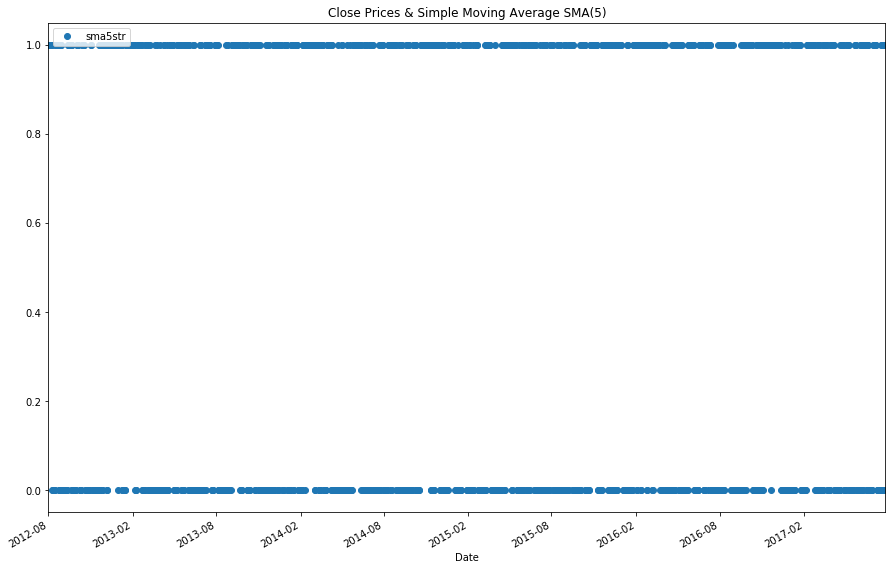

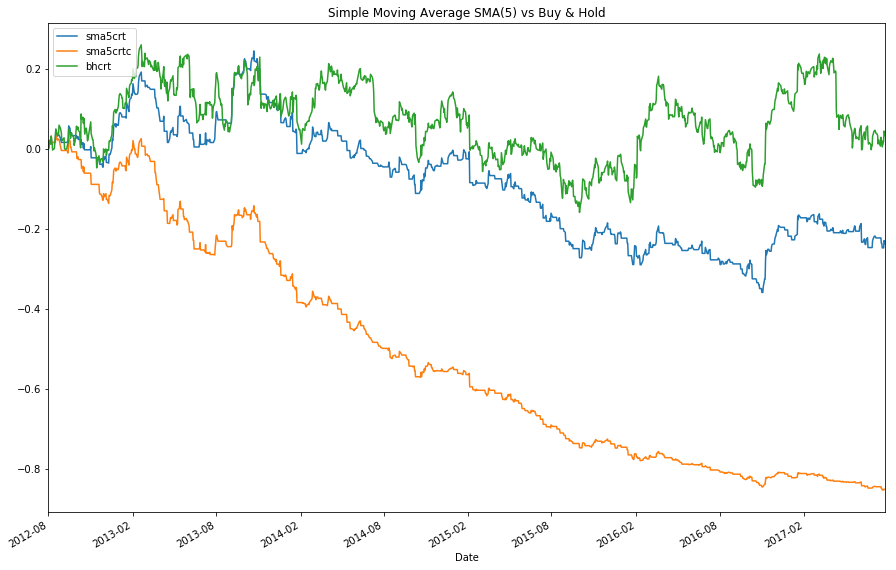

                                 0         1         2          3
0                                     SMA(5)  SMA(5)TC        B&H
1                Annualized Return -0.238763 -0.852412  0.0315017
2    Annualized Standard Deviation  0.164982  0.175362   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   -1.4472  -4.86087   0.132992


In [28]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
stock['sma5sig'] = 0
sma5sig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)']:
        sma5sig = 1.0
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)']:
        sma5sig = -1.0
    else:
        sma5sig = 0.0
    stock.ix[i, 'sma5sig'] = sma5sig

GenerateTradingStrategy('sma5str', 'sma5sig')

SinglePlot('Close Prices & Simple Moving Average SMA(5)', ['Close', 'sma5'])
SinglePlotWithMarker('Close Prices & Simple Moving Average SMA(5)', ['sma5sig'])
SinglePlotWithMarker('Close Prices & Simple Moving Average SMA(5)', 'sma5str')
PriceCrossoverWithoutTradingCommisions('sma5drt', 'sma5str')
PriceCrossoverWithTradingCommition('sma5str(-1)', 'sma5str', 'sma5drtc', 'sma5sig', 'sma5tc')
CumulativeReturns('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'Simple Moving Average SMA(5) vs Buy & Hold')
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'SMA(5)', 'SMA(5)TC', 'B&H')


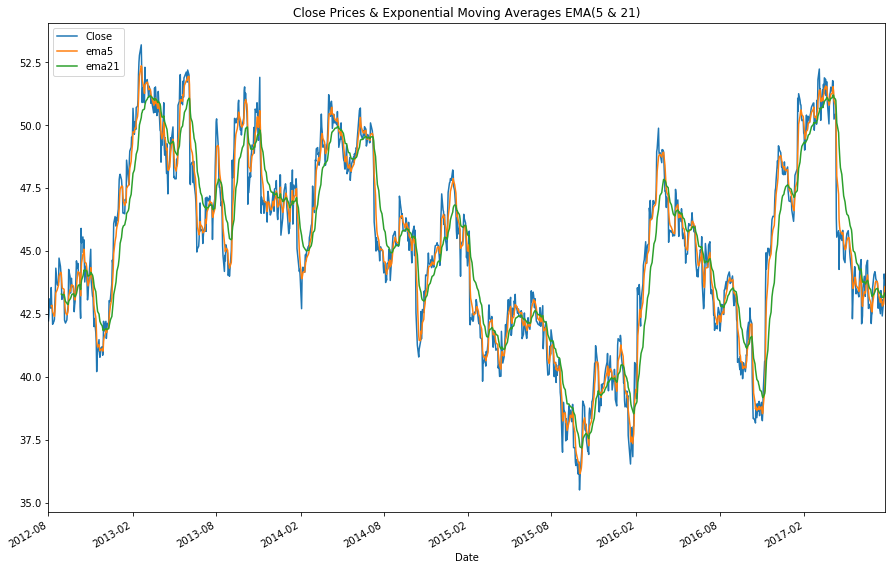

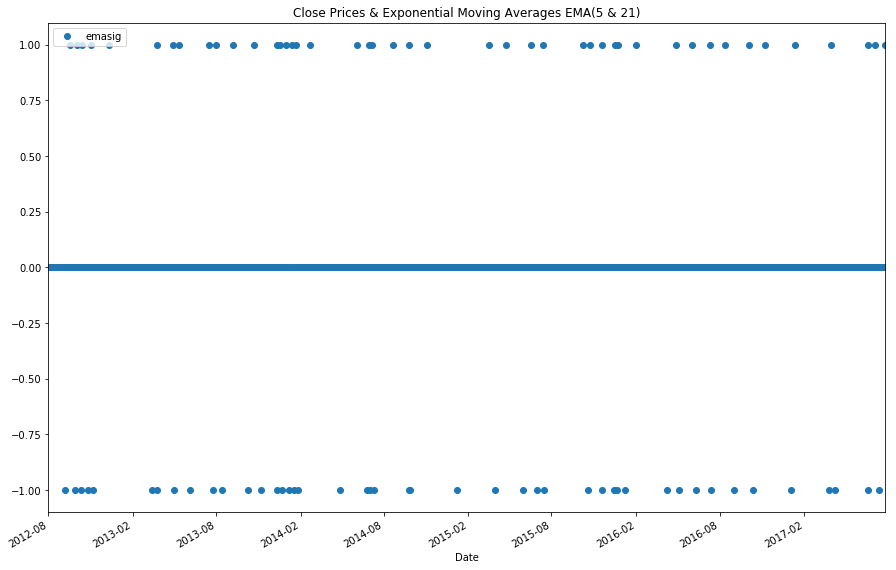

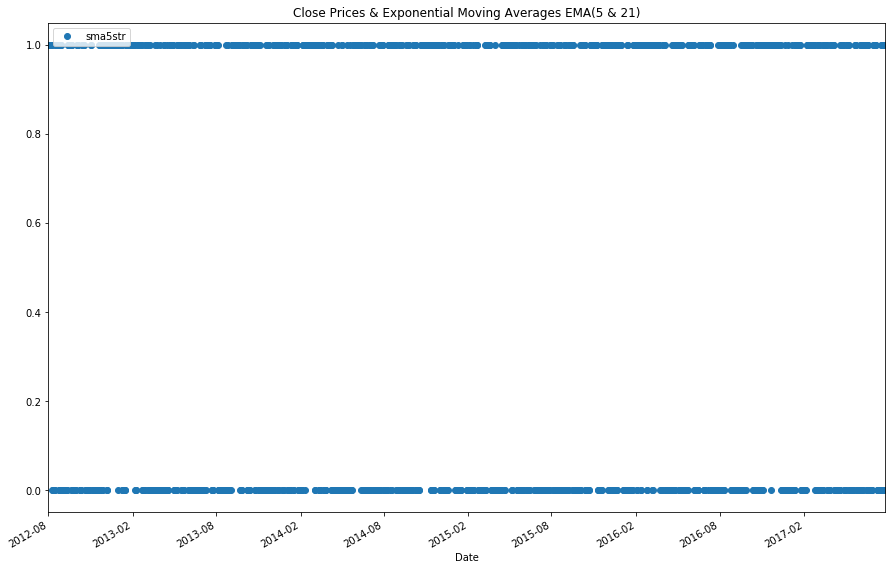

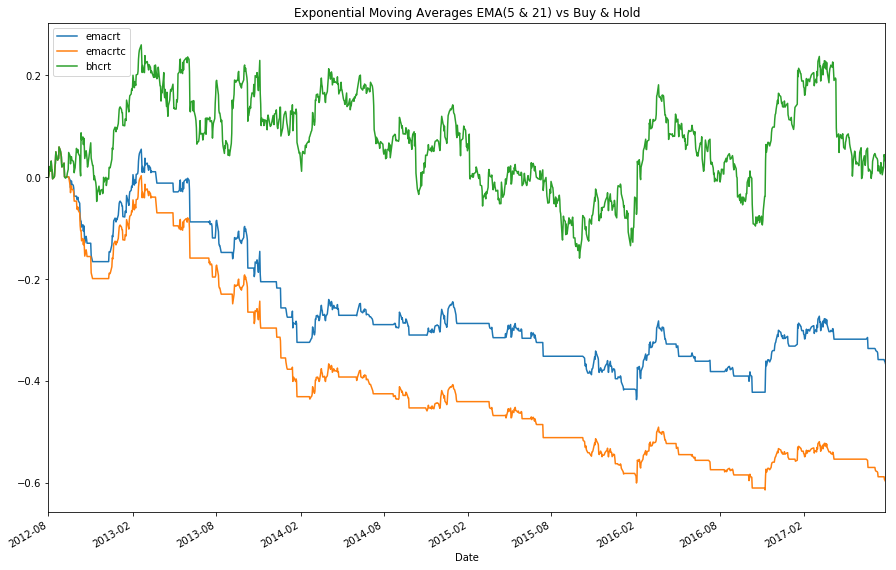

                                 0            1              2          3
0                                   EMA(5 & 21)  EMA(5 & 21)TC        B&H
1                Annualized Return    -0.366022      -0.597393  0.0315017
2    Annualized Standard Deviation     0.158435       0.163086   0.236869
3  Annualized Sharpe Ratio (Rf=0%)     -2.31023       -3.66306   0.132992


In [29]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
stock['emasig'] = 0
emasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['ema5(-2)'] < r[1]['ema21(-2)'] and r[1]['ema5(-1)'] > r[1]['ema21(-1)']:
        emasig = 1
    elif r[1]['ema5(-2)'] > r[1]['ema21(-2)'] and r[1]['ema5(-1)'] < r[1]['ema21(-1)']:
        emasig = -1
    else:
        emasig = 0
    stock.ix[i, 'emasig'] = emasig

SinglePlot('Close Prices & Exponential Moving Averages EMA(5 & 21)', ['Close', 'ema5', 'ema21'])
SinglePlotWithMarker('Close Prices & Exponential Moving Averages EMA(5 & 21)', ['emasig'])
SinglePlotWithMarker('Close Prices & Exponential Moving Averages EMA(5 & 21)', 'sma5str')
GenerateTradingStrategy('emastr', 'emasig')
PriceCrossoverWithoutTradingCommisions('emadrt', 'emastr')
PriceCrossoverWithTradingCommition('emastr(-1)', 'emastr', 'emadrtc', 'emasig', 'ematc')
CumulativeReturns('emacrt', 'emacrtc', 'bhcrt', 'emadrt', 'emadrtc', 'bhdrt', 'Exponential Moving Averages EMA(5 & 21) vs Buy & Hold')
StrategiesPerformanceMetrics('emacrt', 'emacrtc', 'bhcrt', 'emadrt', 'emadrtc', 'bhdrt', 'EMA(5 & 21)', 'EMA(5 & 21)TC', 'B&H')

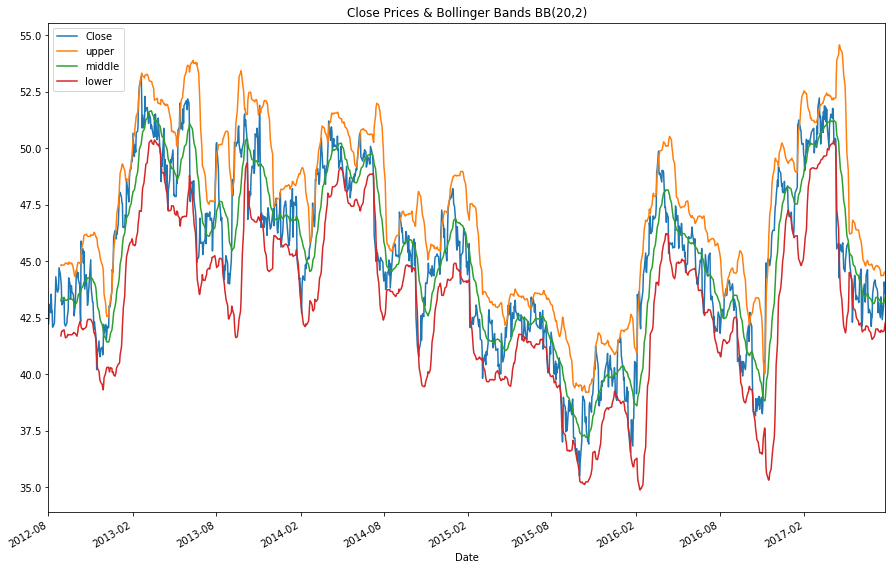

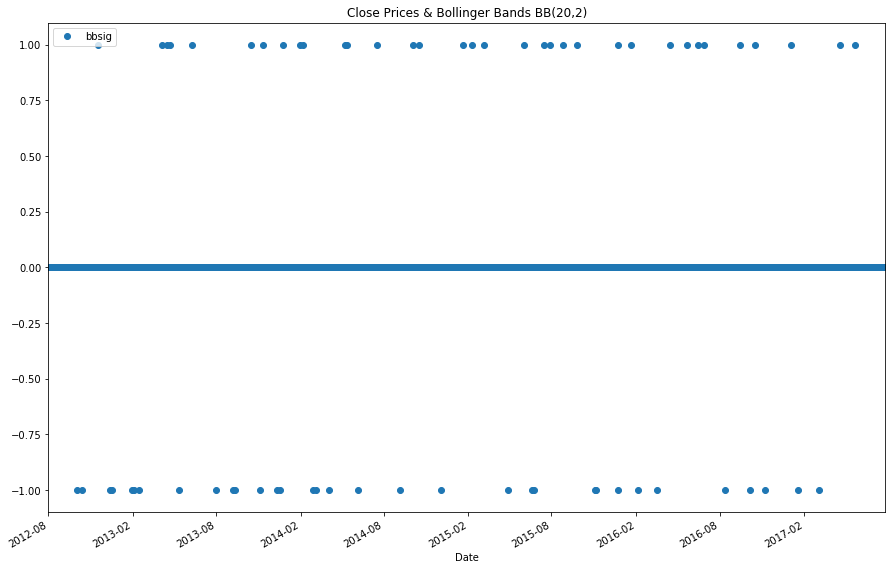

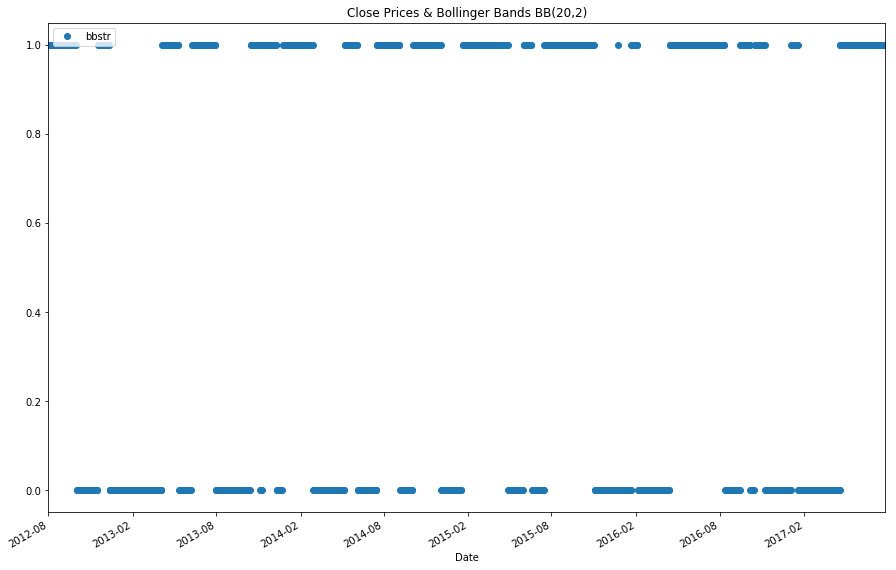

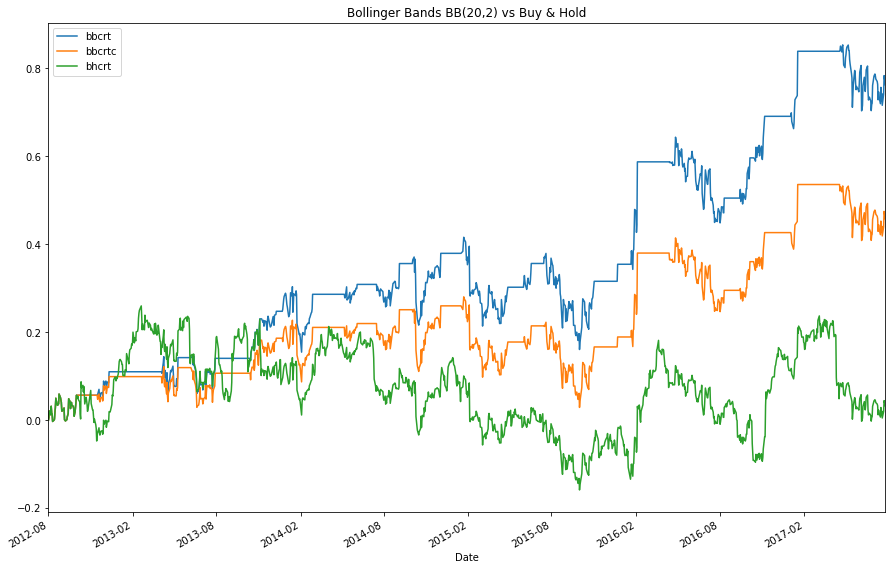

                                 0         1           2          3
0                                   BB(20,2)  BB(20,2)TC        B&H
1                Annualized Return  0.762116    0.456877  0.0315017
2    Annualized Standard Deviation  0.171735    0.172065   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   4.43775     2.65526   0.132992


In [30]:
# Bollinger Bands Crossover Trading Signals
stock['bbsig'] = 0
bbsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    elif r[1]['Close(-2)'] < r[1]['upper(-2)'] and r[1]['Close(-1)'] > r[1]['upper(-1)']:
        bbsig = -1
    else:
        bbsig = 0
    stock.ix[i, 'bbsig'] = bbsig
    
SinglePlot('Close Prices & Bollinger Bands BB(20,2)', ['Close', 'upper', 'middle', 'lower'])
SinglePlotWithMarker('Close Prices & Bollinger Bands BB(20,2)', 'bbsig')
GenerateTradingStrategy('bbstr', 'bbsig')
SinglePlotWithMarker('Close Prices & Bollinger Bands BB(20,2)', 'bbstr')
PriceCrossoverWithoutTradingCommisions('bbdrt', 'bbstr')
PriceCrossoverWithTradingCommition('bbstr(-1)', 'bbstr', 'bbdrtc', 'bbsig', 'bbtc')
CumulativeReturns('bbcrt', 'bbcrtc', 'bhcrt', 'bbdrt', 'bbdrtc', 'bhdrt', 'Bollinger Bands BB(20,2) vs Buy & Hold')
StrategiesPerformanceMetrics('bbcrt', 'bbcrtc', 'bhcrt', 'bbdrt', 'bbdrtc', 'bhdrt', 'BB(20,2)', 'BB(20,2)TC', 'B&H')

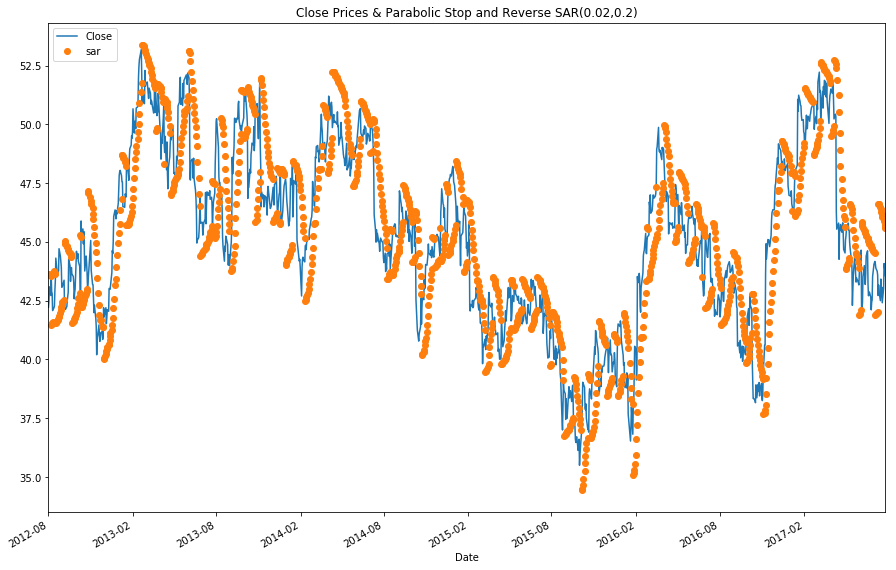

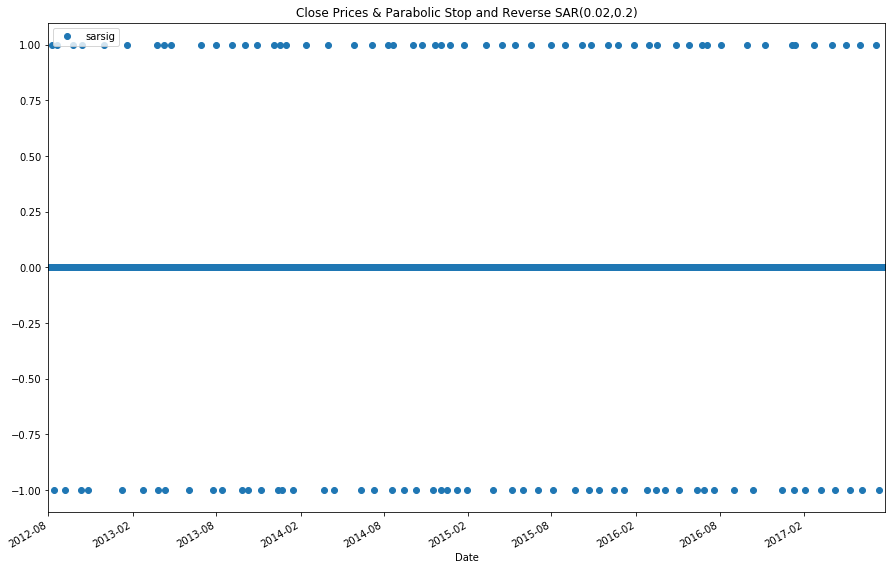

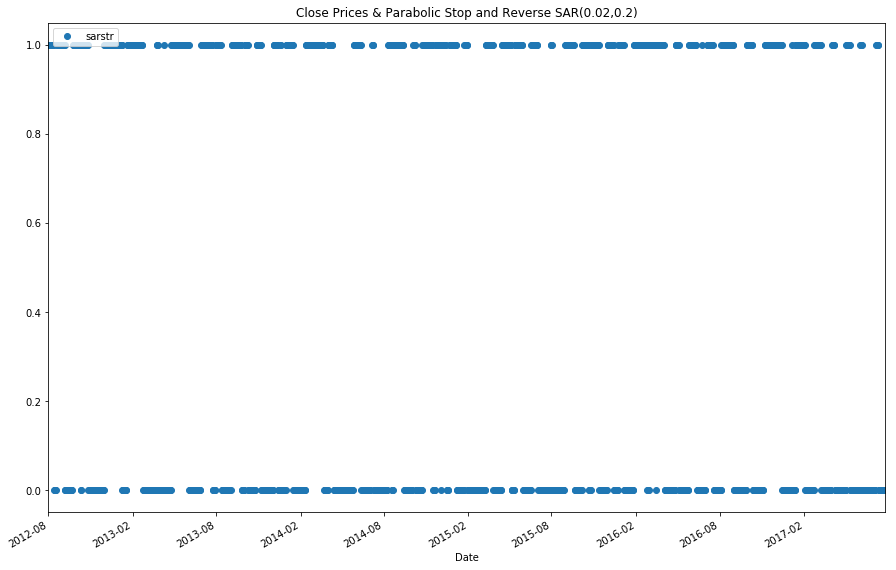

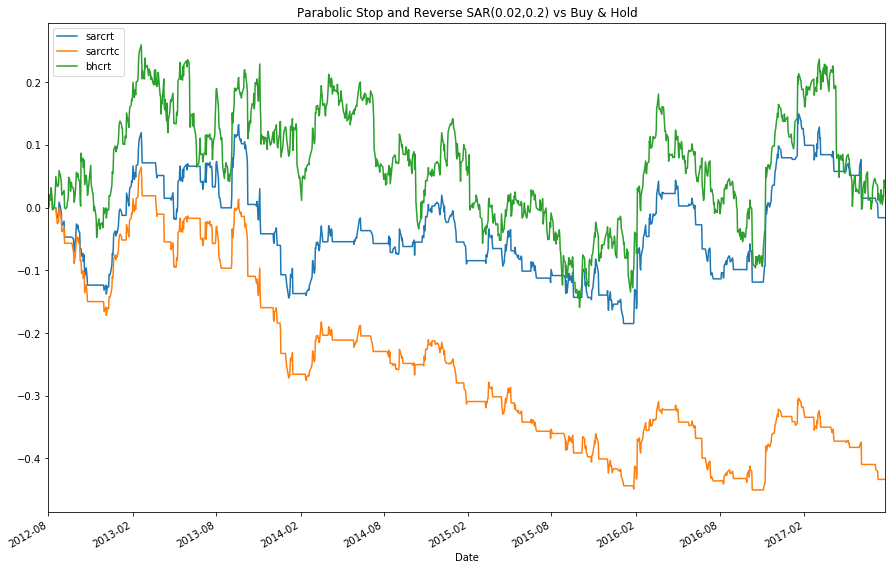

                                 0              1                2          3
0                                   SAR(0.02,0.2)  SAR(0.02,0.2)TC        B&H
1                Annualized Return      -0.016146        -0.433702  0.0315017
2    Annualized Standard Deviation       0.165517         0.168062   0.236869
3  Annualized Sharpe Ratio (Rf=0%)     -0.0975491          -2.5806   0.132992


In [31]:
# SAR Trading Signals
stock['sarsig'] = 0
sarsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sar(-2)'] and r[1]['Close(-1)'] > r[1]['sar(-1)']:
        sarsig = 1
    elif r[1]['Close(-2)'] > r[1]['sar(-2)'] and r[1]['Close(-1)'] < r[1]['sar(-1)']:
        sarsig = -1
    else:
        sarsig = 0
    stock.ix[i, 'sarsig'] = sarsig
    
DoublePlotWithOMarker('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)', ['Close'], 'sar')
SinglePlotWithMarker('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)', 'sarsig')
GenerateTradingStrategy('sarstr', 'sarsig')
SinglePlotWithMarker('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)', 'sarstr')
PriceCrossoverWithoutTradingCommisions('sardrt', 'sarstr')
PriceCrossoverWithTradingCommition('sarstr(-1)', 'sarstr', 'sardrtc', 'sarsig', 'sartc')
CumulativeReturns('sarcrt', 'sarcrtc', 'bhcrt', 'sardrt', 'sardrtc', 'bhdrt', 'Parabolic Stop and Reverse SAR(0.02,0.2) vs Buy & Hold')
StrategiesPerformanceMetrics('sarcrt', 'sarcrtc', 'bhcrt', 'sardrt', 'sardrtc', 'bhdrt', 'SAR(0.02,0.2)', 'SAR(0.02,0.2)TC', 'B&H')


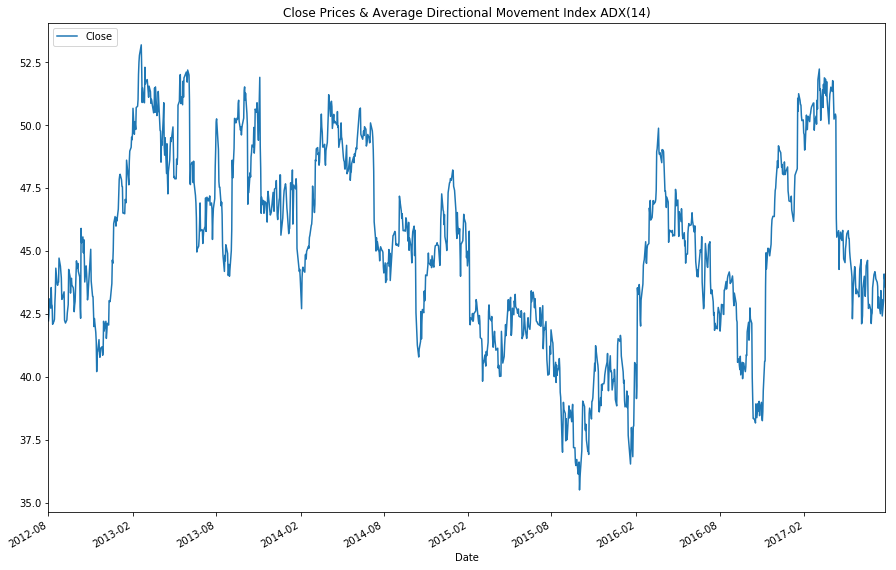

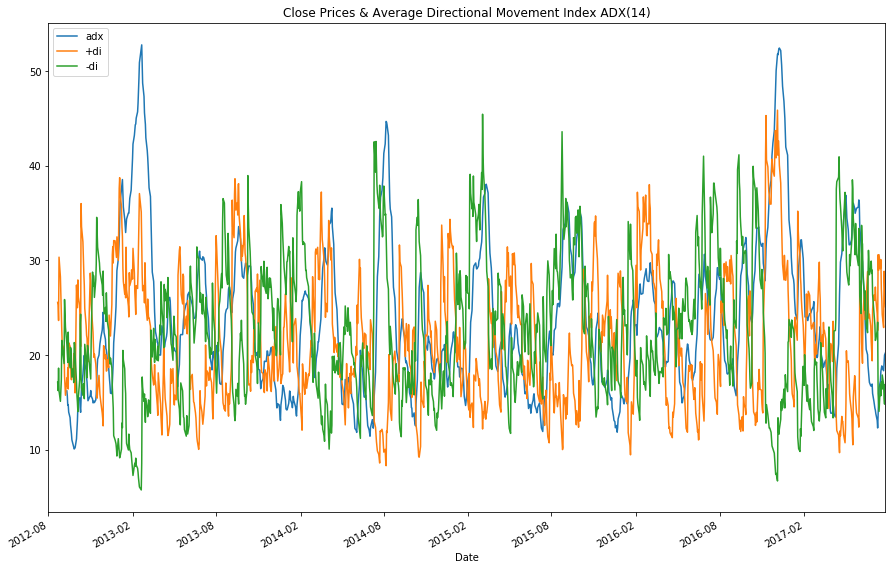

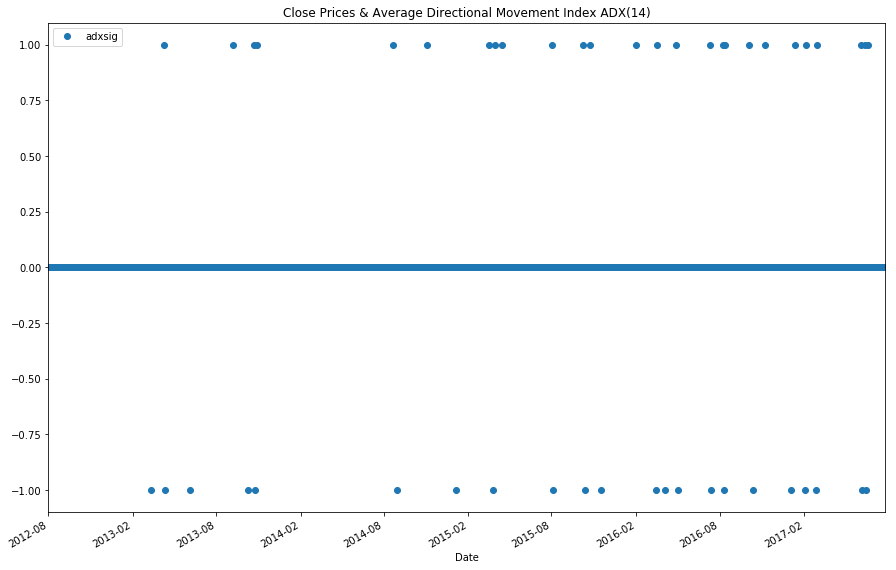

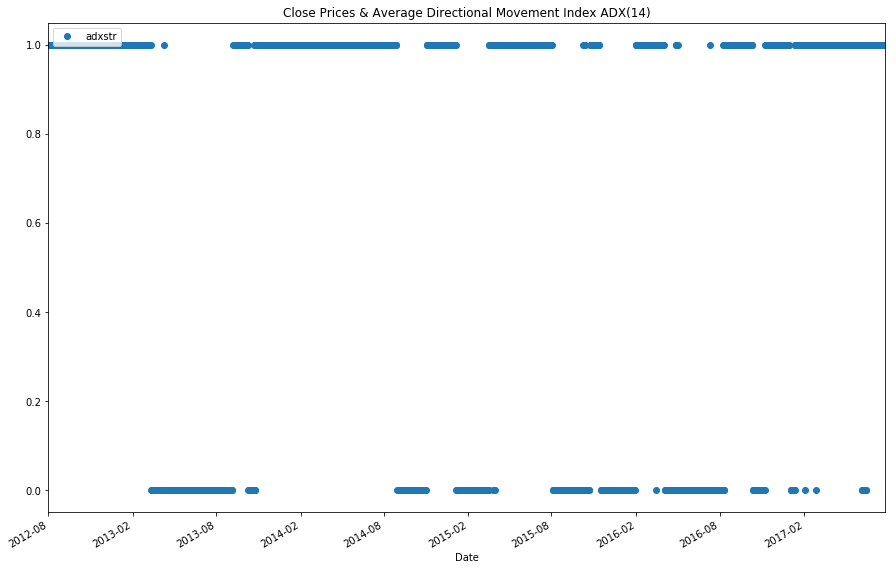

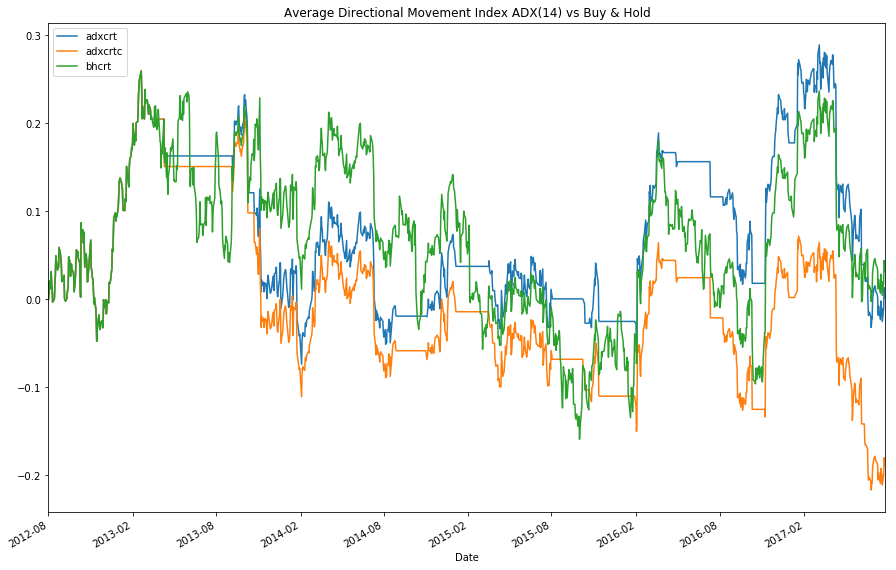

                                 0            1          2          3
0                                       ADX(14)  ADX(14)TC        B&H
1                Annualized Return  0.000978748   -0.19004  0.0315017
2    Annualized Standard Deviation     0.183778   0.185599   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   0.00532572   -1.02393   0.132992


In [32]:
# Average Directional Movement Trade Signals
stock['adxsig'] = 0
adxsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)'] < r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = -1
    else:
        adxsig = 0
    stock.ix[i, 'adxsig'] = adxsig

SinglePlot('Close Prices & Average Directional Movement Index ADX(14)', ['Close'])
SinglePlot('Close Prices & Average Directional Movement Index ADX(14)', ['adx', '+di', '-di'])
SinglePlotWithMarker('Close Prices & Average Directional Movement Index ADX(14)', 'adxsig')
GenerateTradingStrategy('adxstr', 'adxsig')
SinglePlotWithMarker('Close Prices & Average Directional Movement Index ADX(14)', 'adxstr')
PriceCrossoverWithoutTradingCommisions('adxdrt', 'adxstr')
PriceCrossoverWithTradingCommition('adxstr(-1)', 'adxstr', 'adxdrtc', 'adxsig', 'adxtc')
CumulativeReturns('adxcrt', 'adxcrtc', 'bhcrt', 'adxdrt', 'adxdrtc', 'bhdrt', 'Average Directional Movement Index ADX(14) vs Buy & Hold')
StrategiesPerformanceMetrics('adxcrt', 'adxcrtc', 'bhcrt', 'adxdrt', 'adxdrtc', 'bhdrt', 'ADX(14)', 'ADX(14)TC', 'B&H')


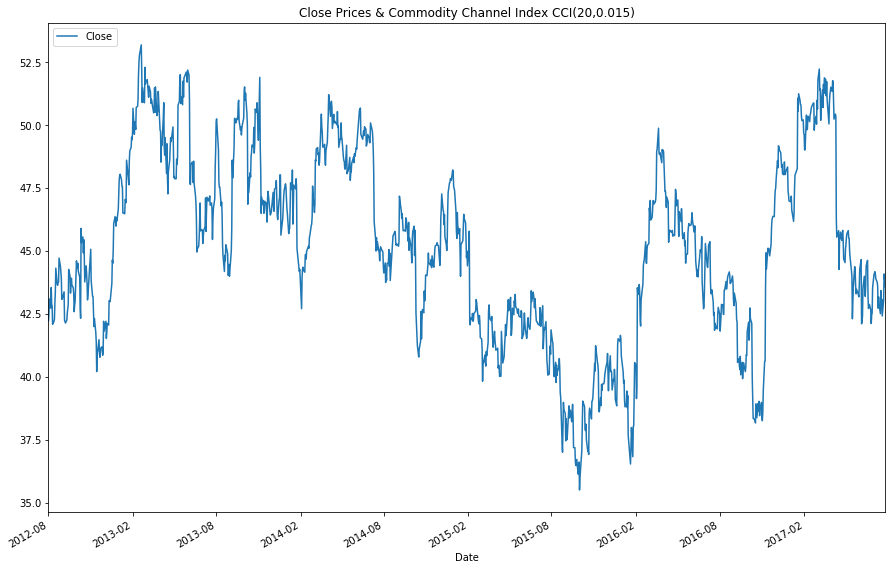

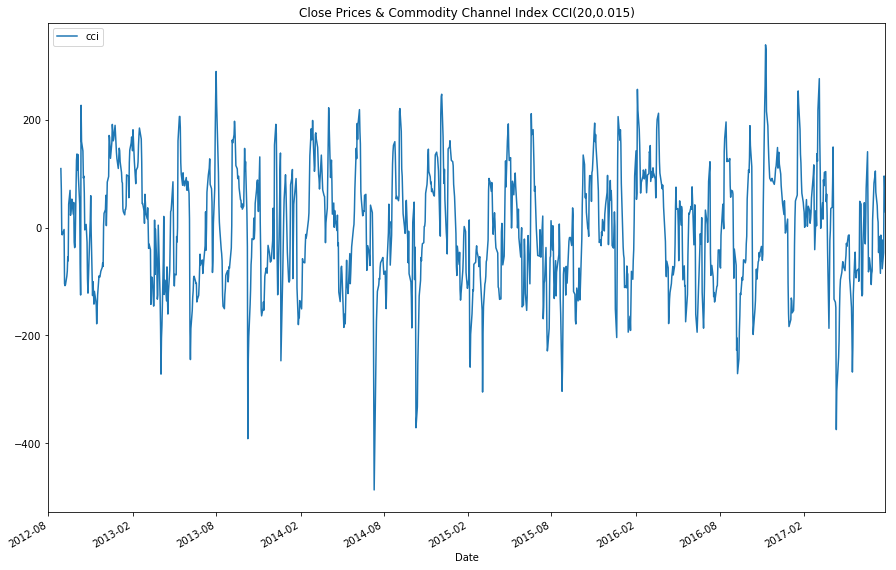

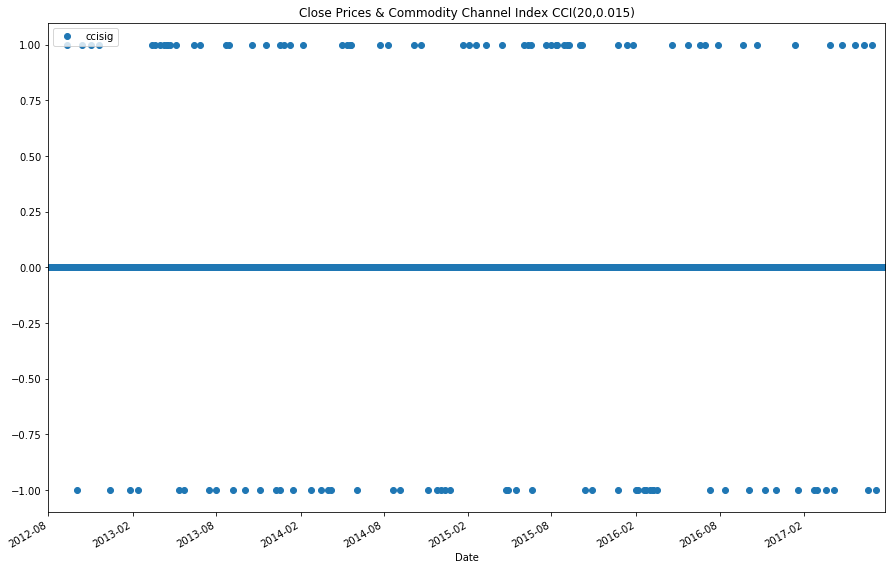

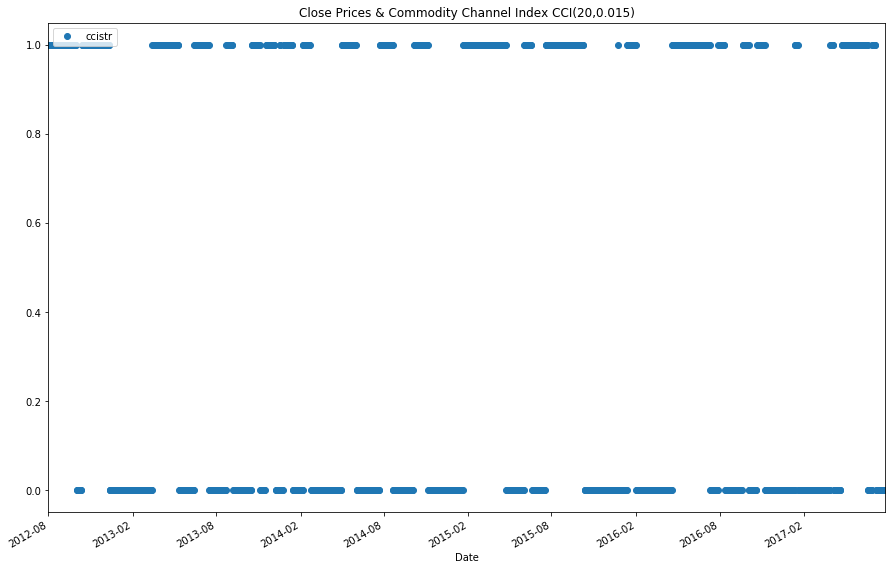

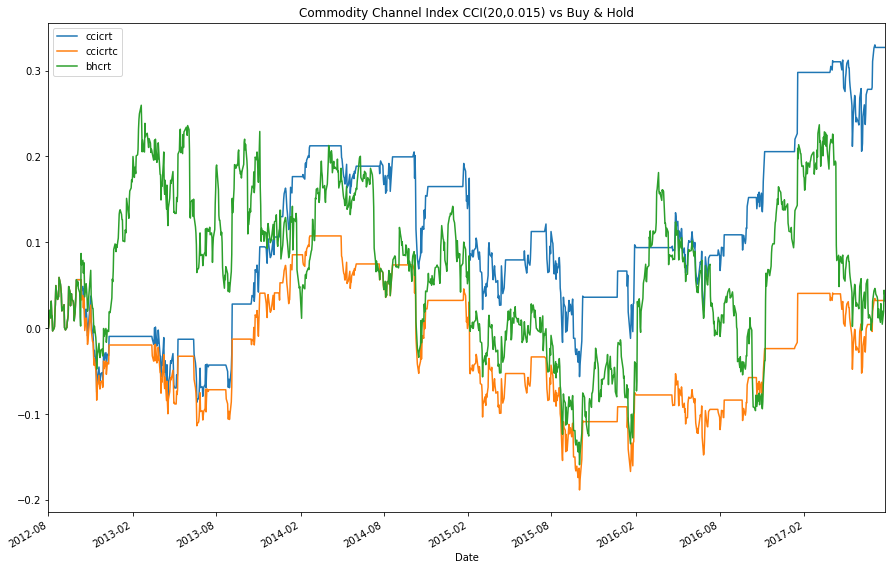

                                 0              1                2          3
0                                   CCI(20,0.015)  CCI(20,0.015)TC        B&H
1                Annualized Return       0.326912        0.0321172  0.0315017
2    Annualized Standard Deviation       0.158927         0.160493   0.236869
3  Annualized Sharpe Ratio (Rf=0%)          2.057         0.200116   0.132992


In [33]:
# TS (buy=1 , sell=-1, do nothing=0)
stock['ccisig'] = 0
ccisig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['cci(-2)'] < -100 and r[1]['cci(-1)'] > -100:
        ccisig = 1
    elif r[1]['cci(-2)'] < 100 and r[1]['cci(-1)'] > 100:
        ccisig = -1
    else:
        ccisig = 0
    stock.ix[i, 'ccisig'] = ccisig
    
SinglePlot('Close Prices & Commodity Channel Index CCI(20,0.015)', ['Close'])
SinglePlot('Close Prices & Commodity Channel Index CCI(20,0.015)', ['cci'])
SinglePlotWithMarker('Close Prices & Commodity Channel Index CCI(20,0.015)', 'ccisig')
GenerateTradingStrategy('ccistr', 'ccisig')
SinglePlotWithMarker('Close Prices & Commodity Channel Index CCI(20,0.015)', 'ccistr')
PriceCrossoverWithoutTradingCommisions('ccidrt', 'ccistr')
PriceCrossoverWithTradingCommition('ccistr(-1)', 'ccistr', 'ccidrtc', 'ccisig', 'ccitc')
CumulativeReturns('ccicrt', 'ccicrtc', 'bhcrt', 'ccidrt', 'ccidrtc', 'bhdrt', 'Commodity Channel Index CCI(20,0.015) vs Buy & Hold')
StrategiesPerformanceMetrics('ccicrt', 'ccicrtc', 'bhcrt', 'ccidrt', 'ccidrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')


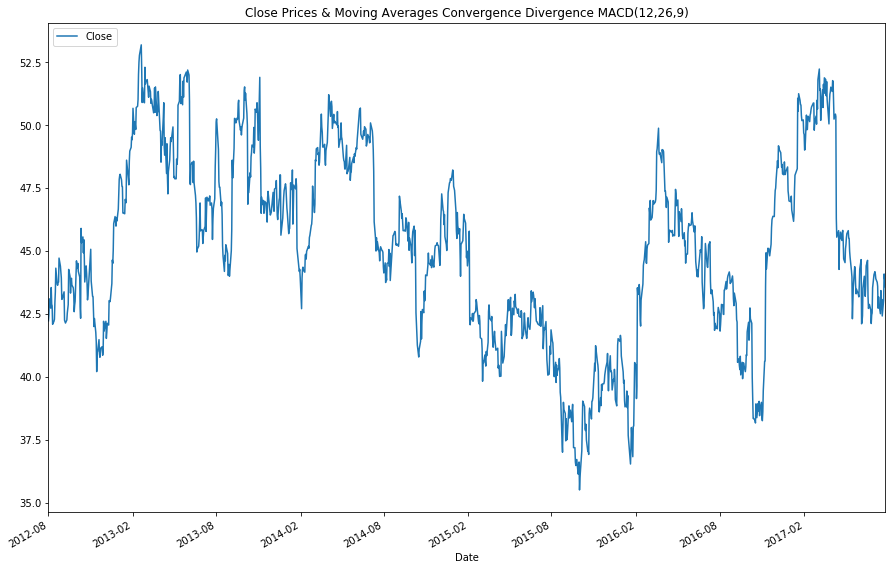

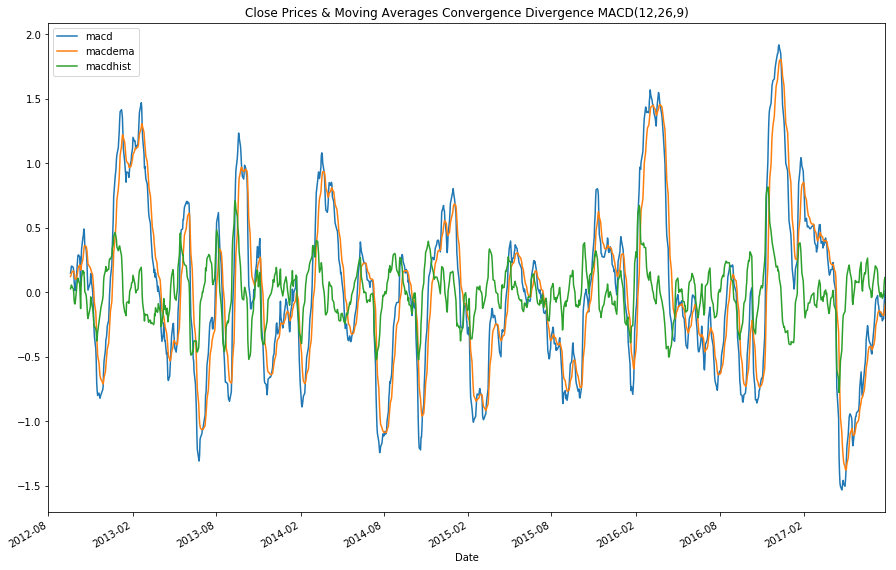

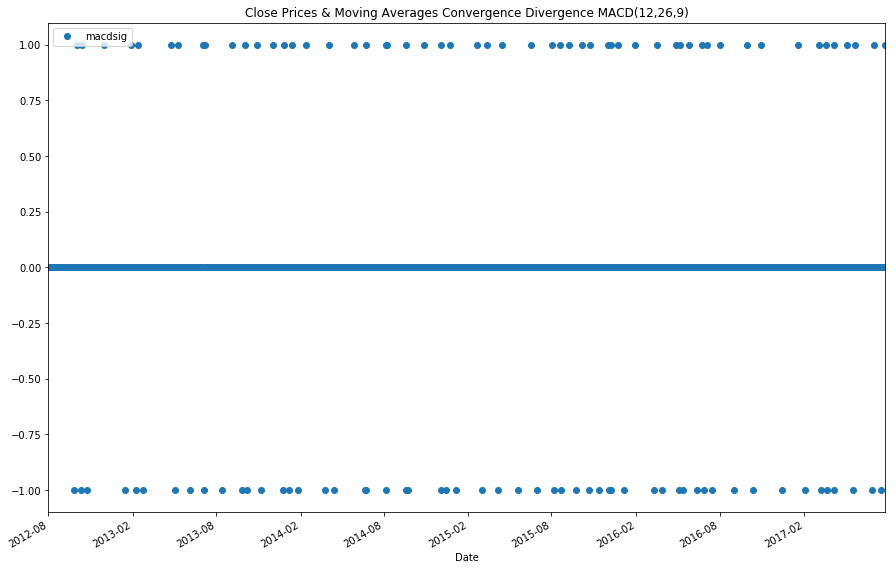

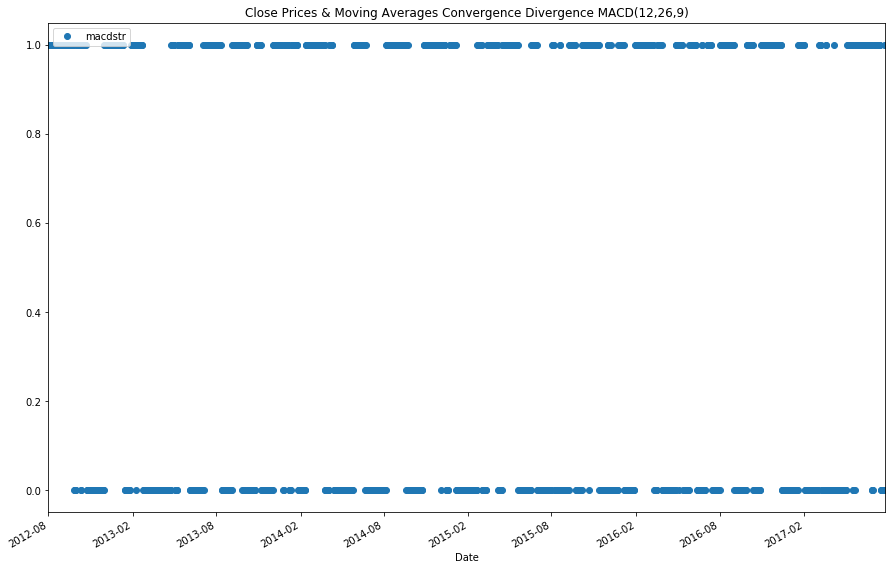

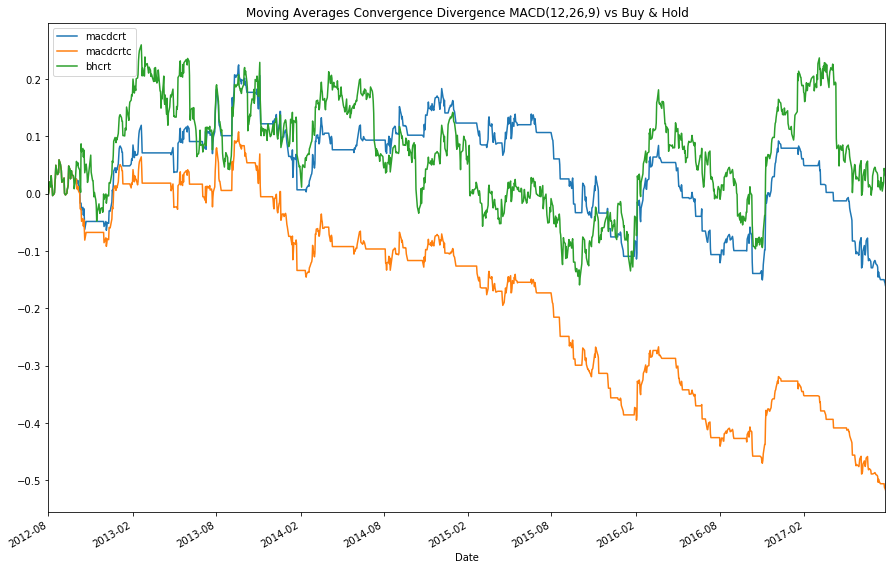

                                 0              1                2          3
0                                   MACD(12,26,9)  MACD(12,26,9)TC        B&H
1                Annualized Return      -0.160133        -0.516754  0.0315017
2    Annualized Standard Deviation       0.160735         0.163754   0.236869
3  Annualized Sharpe Ratio (Rf=0%)       -0.99626         -3.15566   0.132992


In [34]:
# MACD
stock['macdsig'] = 0
macdsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    stock.ix[i, 'macdsig'] = macdsig
    
SinglePlot('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)', ['Close'])
SinglePlot('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)', ['macd', 'macdema', 'macdhist'])
SinglePlotWithMarker('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)', 'macdsig')
GenerateTradingStrategy('macdstr', 'macdsig')
SinglePlotWithMarker('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)', 'macdstr')
PriceCrossoverWithoutTradingCommisions('macddrt', 'macdstr')
PriceCrossoverWithTradingCommition('macdstr(-1)', 'macdstr', 'macddrtc', 'macdsig', 'macdtc')
CumulativeReturns('macdcrt', 'macdcrtc', 'bhcrt', 'macddrt', 'macddrtc', 'bhdrt', 'Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
StrategiesPerformanceMetrics('macdcrt', 'macdcrtc', 'bhcrt', 'macddrt', 'macddrtc', 'bhdrt', 'MACD(12,26,9)', 'MACD(12,26,9)TC', 'B&H')


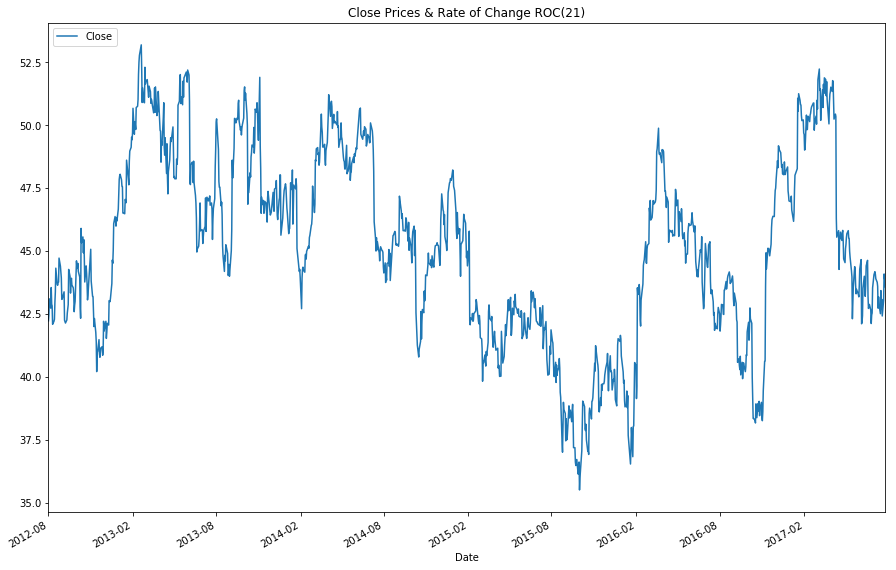

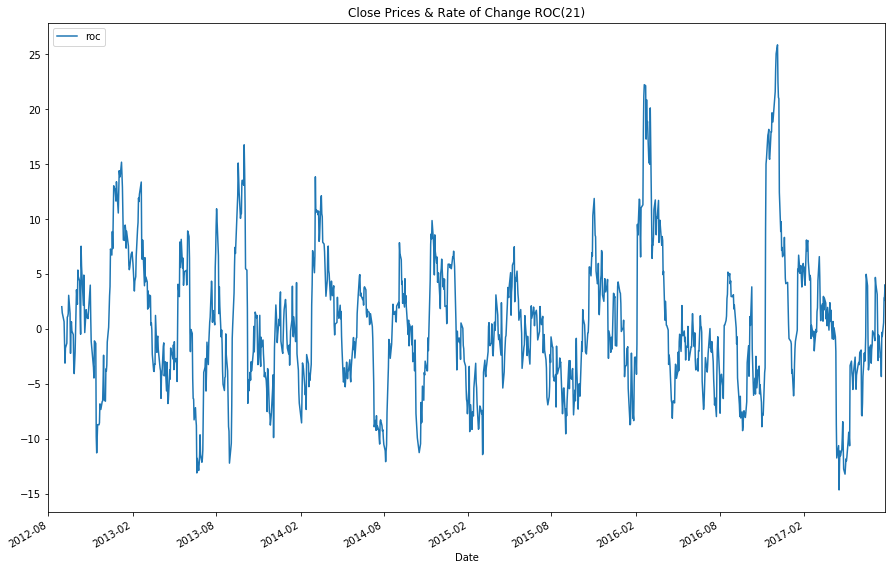

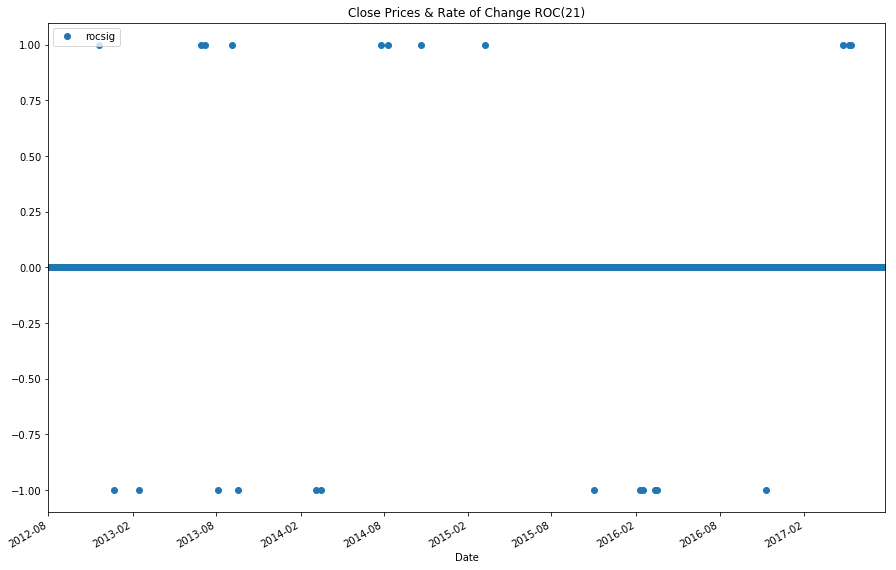

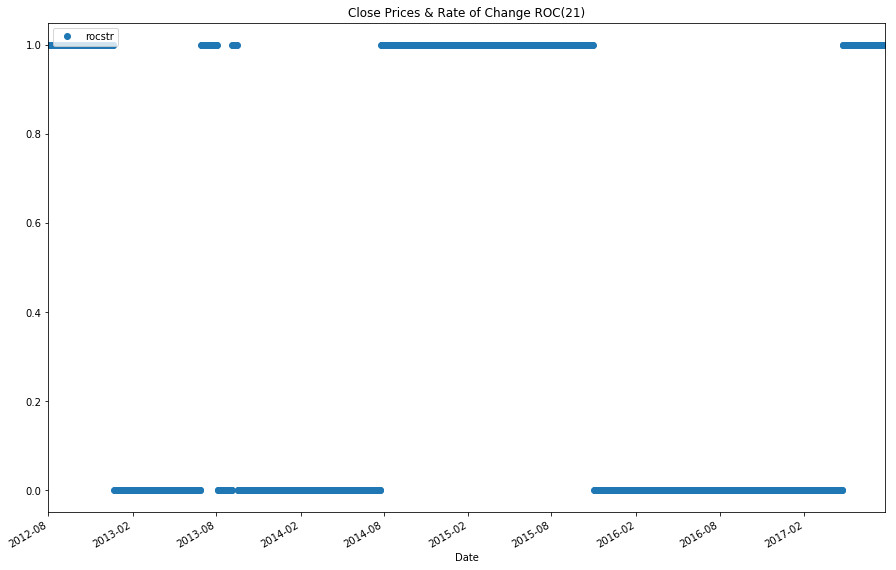

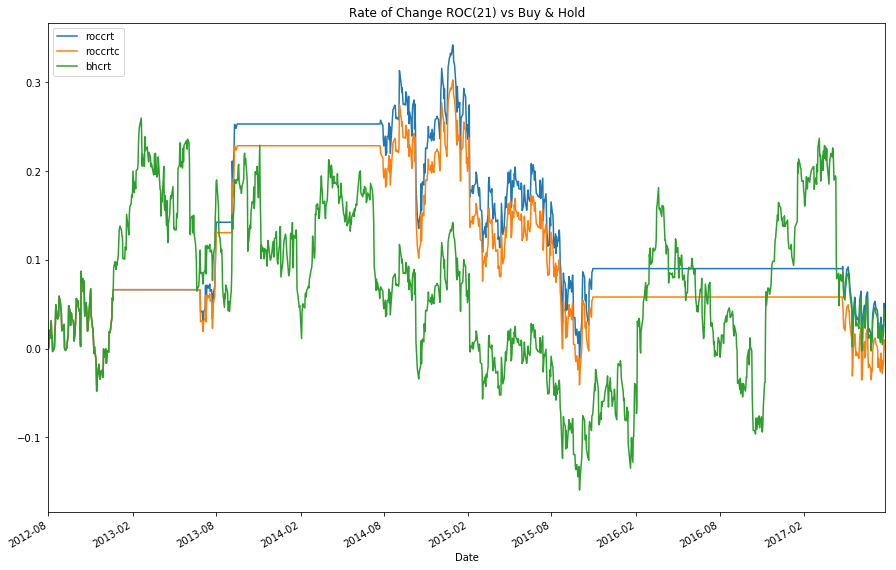

                                 0         1          2          3
0                                    ROC(21)  ROC(21)TC        B&H
1                Annualized Return -0.238763  -0.852412  0.0315017
2    Annualized Standard Deviation  0.164982   0.175362   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   -1.4472   -4.86087   0.132992


In [35]:
# ROC
stock['rocsig'] = 0
rocsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['roc(-2)'] < -10 and r[1]['roc(-1)'] > -10:
        rocsig = 1
    elif r[1]['roc(-2)'] < 10 and r[1]['roc(-1)'] > 10:
        rocsig = -1
    else:
        rocsig = 0
    stock.ix[i, 'rocsig'] = rocsig

SinglePlot('Close Prices & Rate of Change ROC(21)', ['Close'])
SinglePlot('Close Prices & Rate of Change ROC(21)', ['roc'])
SinglePlotWithMarker('Close Prices & Rate of Change ROC(21)', 'rocsig')
GenerateTradingStrategy('rocstr', 'rocsig')
SinglePlotWithMarker('Close Prices & Rate of Change ROC(21)', 'rocstr')
PriceCrossoverWithoutTradingCommisions('rocdrt', 'rocstr')
PriceCrossoverWithTradingCommition('rocstr(-1)', 'rocstr', 'rocdrtc', 'rocsig', 'roctc')
CumulativeReturns('roccrt', 'roccrtc', 'bhcrt', 'rocdrt', 'rocdrtc', 'bhdrt', 'Rate of Change ROC(21) vs Buy & Hold')
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'ROC(21)', 'ROC(21)TC', 'B&H')


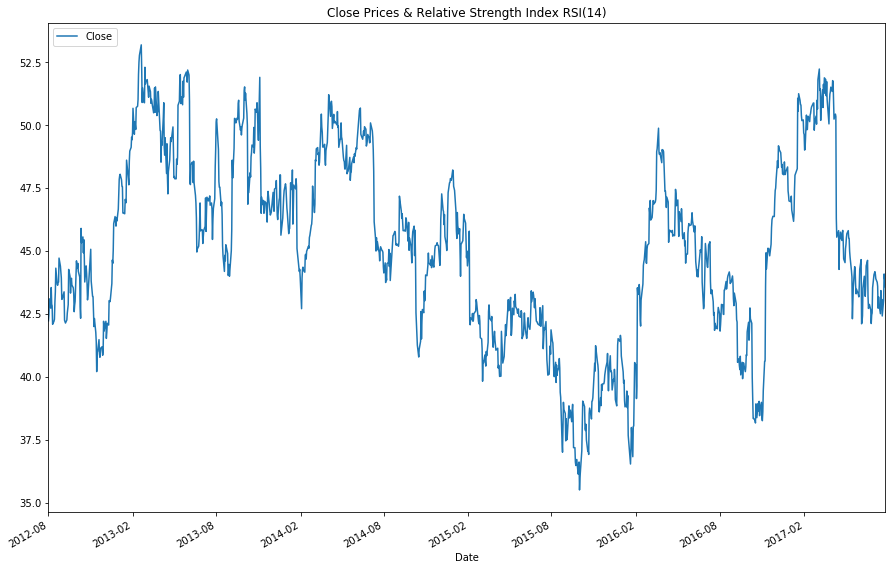

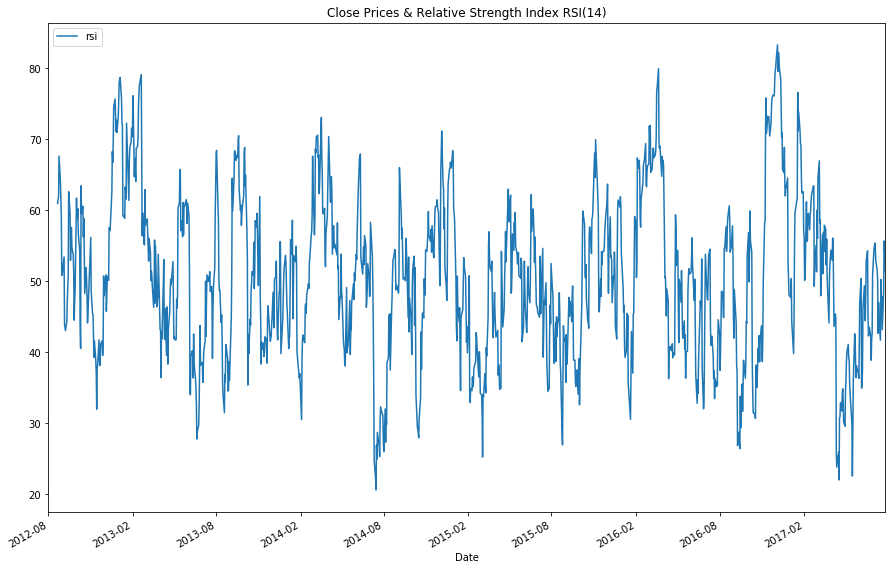

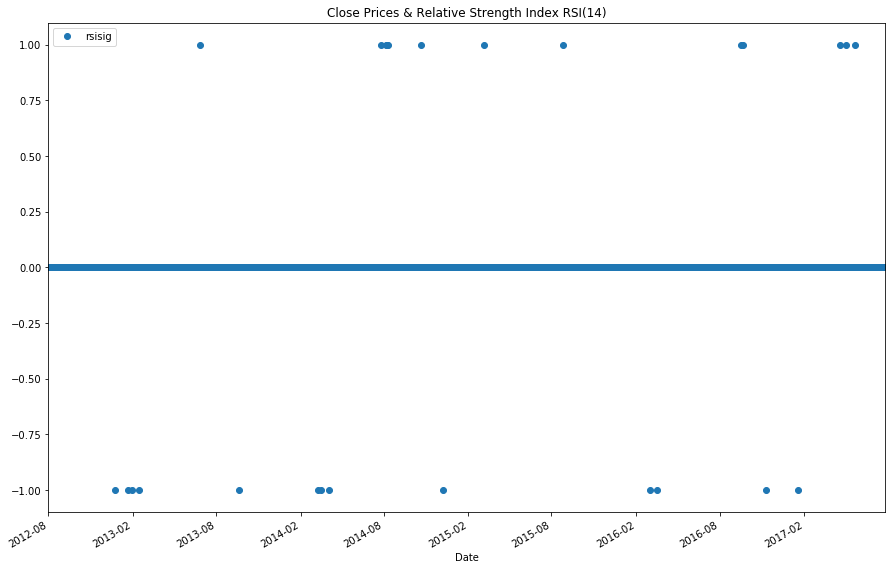

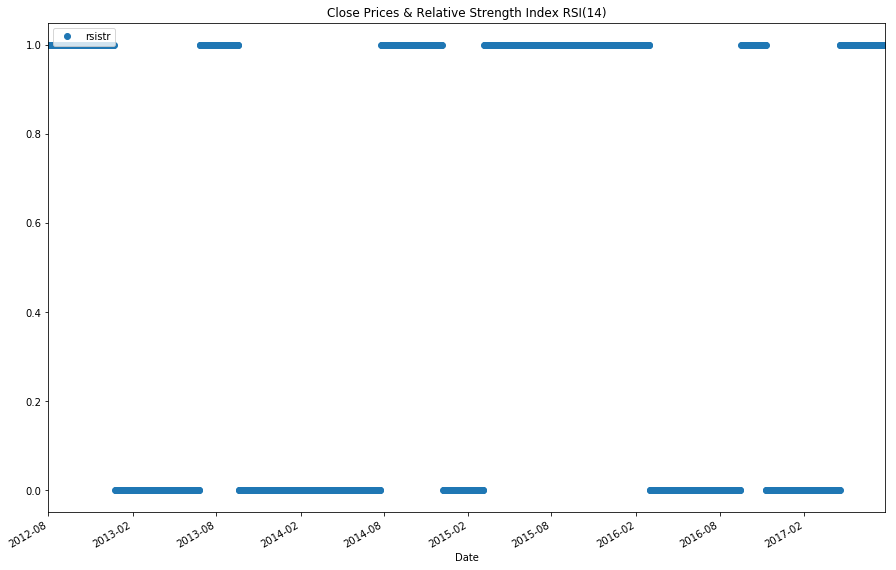

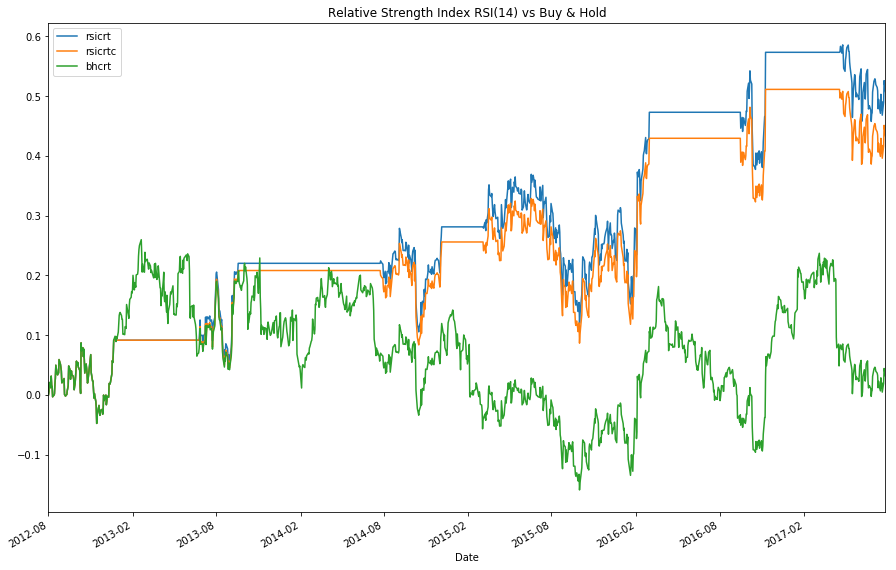

                                 0         1          2          3
0                                    RSI(14)  RSI(14)TC        B&H
1                Annualized Return   0.50732     0.4334  0.0315017
2    Annualized Standard Deviation  0.173393   0.173734   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   2.92583    2.49461   0.132992


In [36]:
# Relative Strength Trading Signal
stock['rsisig'] = 0
rsisig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['rsi(-2)'] < 30 and r[1]['rsi(-1)'] > 30:
        rsisig = 1
    elif r[1]['rsi(-2)'] < 70 and r[1]['rsi(-1)'] > 70:
        rsisig = -1
    else:
        rsisig = 0
    stock.ix[i, 'rsisig'] = rsisig
    
SinglePlot('Close Prices & Relative Strength Index RSI(14)', ['Close'])
SinglePlot('Close Prices & Relative Strength Index RSI(14)', ['rsi'])
SinglePlotWithMarker('Close Prices & Relative Strength Index RSI(14)', 'rsisig')
GenerateTradingStrategy('rsistr', 'rsisig')
SinglePlotWithMarker('Close Prices & Relative Strength Index RSI(14)', 'rsistr')
PriceCrossoverWithoutTradingCommisions('rsidrt', 'rsistr')
PriceCrossoverWithTradingCommition('rsistr(-1)', 'rsistr', 'rsidrtc', 'rsisig', 'rsitc')
CumulativeReturns('rsicrt', 'rsicrtc', 'bhcrt', 'rsidrt', 'rsidrtc', 'bhdrt', 'Relative Strength Index RSI(14) vs Buy & Hold')
StrategiesPerformanceMetrics('rsicrt', 'rsicrtc', 'bhcrt', 'rsidrt', 'rsidrtc', 'bhdrt', 'RSI(14)', 'RSI(14)TC', 'B&H')



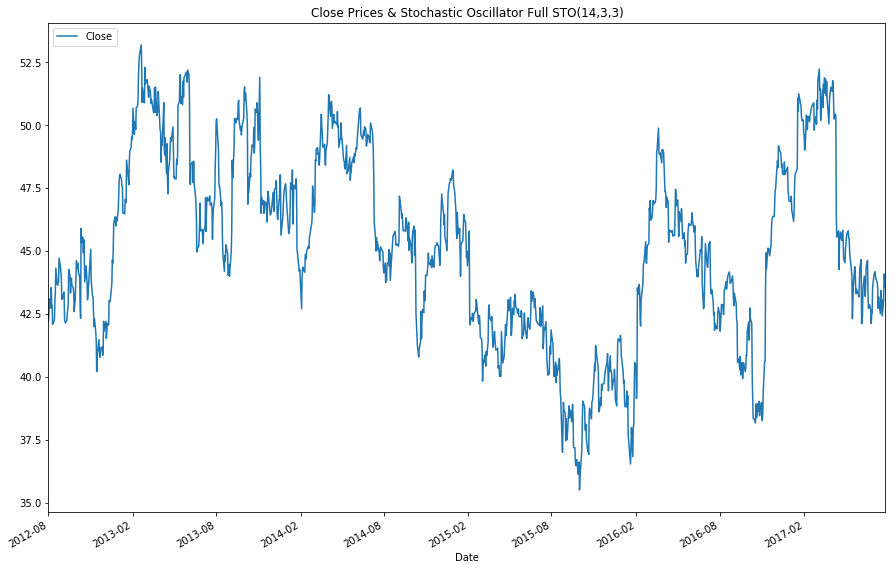

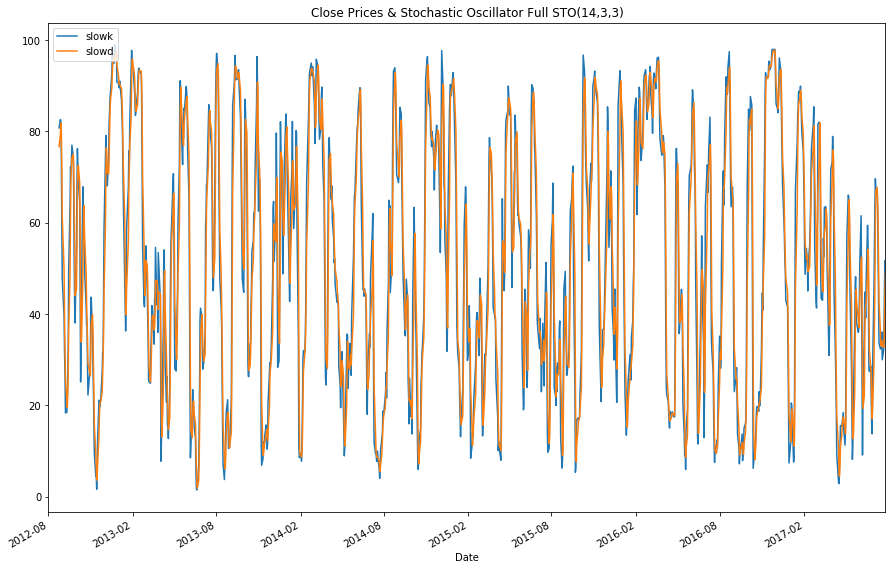

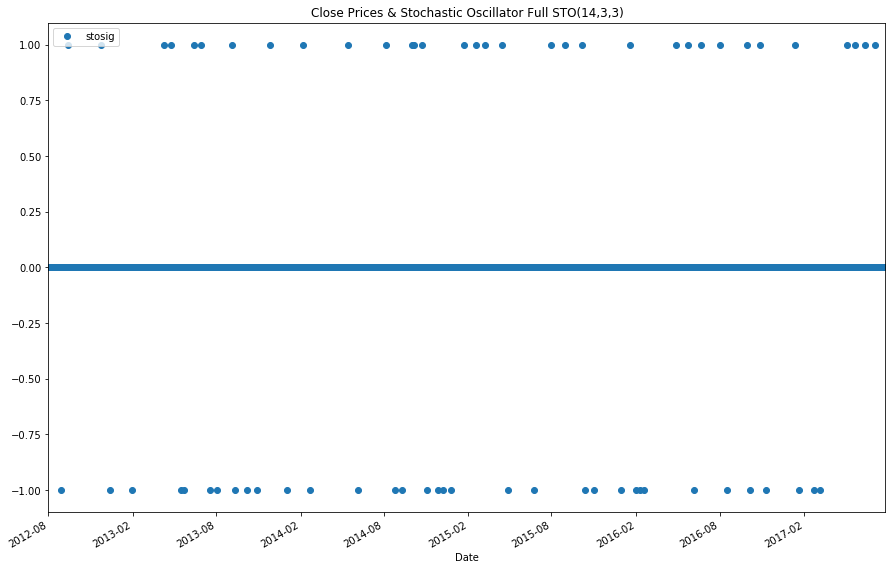

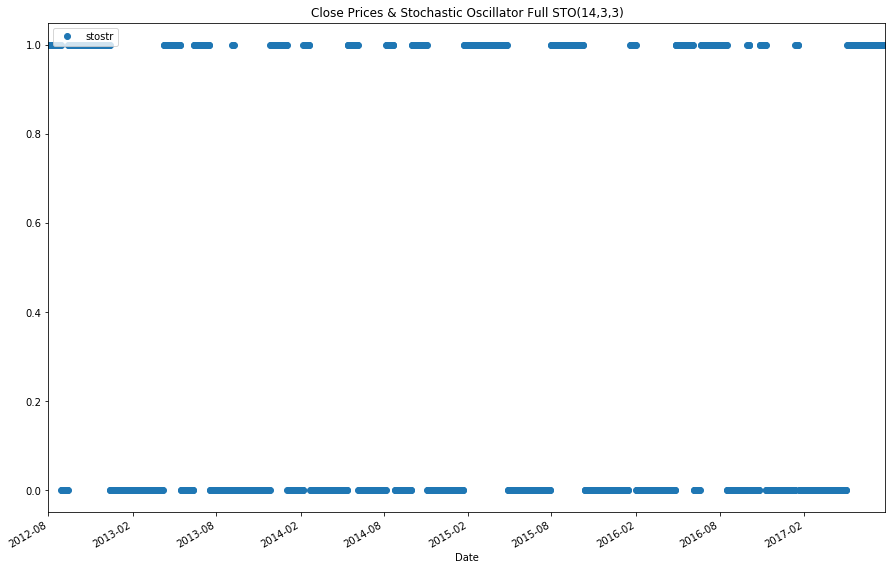

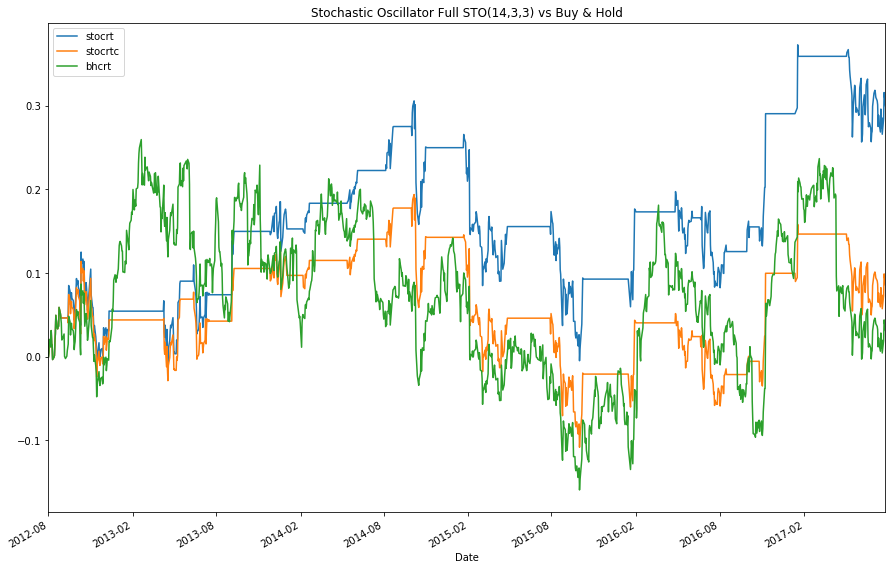

                                 0            1              2          3
0                                   STO(14,3,3)  STO(14,3,3)TC        B&H
1                Annualized Return     0.299961      0.0858541  0.0315017
2    Annualized Standard Deviation     0.160072       0.160002   0.236869
3  Annualized Sharpe Ratio (Rf=0%)      1.87392        0.53658   0.132992


In [37]:
# Stochastic Oscillator Trading Signal
stock['stosig'] = 0
stosig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['slowd(-2)'] < 20 and r[1]['slowd(-1)'] > 20:
        stosig = 1
    elif r[1]['slowd(-2)'] < 80 and r[1]['slowd(-1)'] > 80:
        stosig = -1
    else:
        stosig = 0
    stock.ix[i, 'stosig'] = stosig

SinglePlot('Close Prices & Stochastic Oscillator Full STO(14,3,3)', ['Close'])
SinglePlot('Close Prices & Stochastic Oscillator Full STO(14,3,3)', ['slowk', 'slowd'])
SinglePlotWithMarker('Close Prices & Stochastic Oscillator Full STO(14,3,3)', 'stosig')
GenerateTradingStrategy('stostr', 'stosig')
SinglePlotWithMarker('Close Prices & Stochastic Oscillator Full STO(14,3,3)', 'stostr')
PriceCrossoverWithoutTradingCommisions('stodrt', 'stostr')
PriceCrossoverWithTradingCommition('stostr(-1)', 'stostr', 'stodrtc', 'stosig', 'stotc')
CumulativeReturns('stocrt', 'stocrtc', 'bhcrt', 'stodrt', 'stodrtc', 'bhdrt', 'Stochastic Oscillator Full STO(14,3,3) vs Buy & Hold')
StrategiesPerformanceMetrics('stocrt', 'stocrtc', 'bhcrt', 'stodrt', 'stodrtc', 'bhdrt', 'STO(14,3,3)', 'STO(14,3,3)TC', 'B&H')


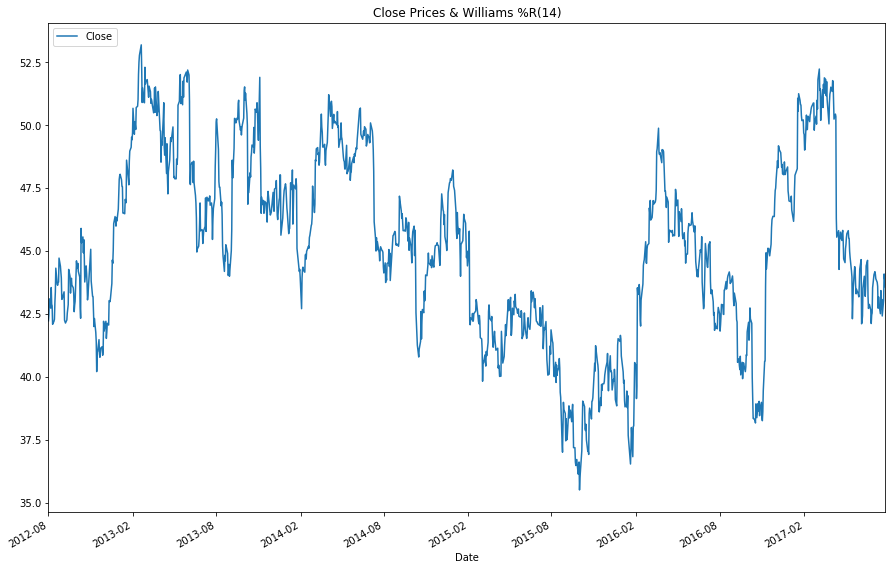

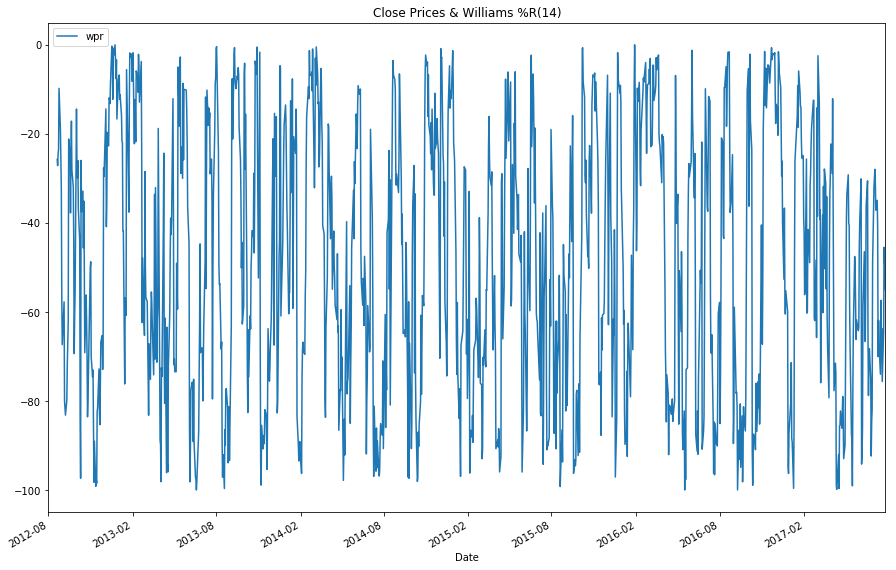

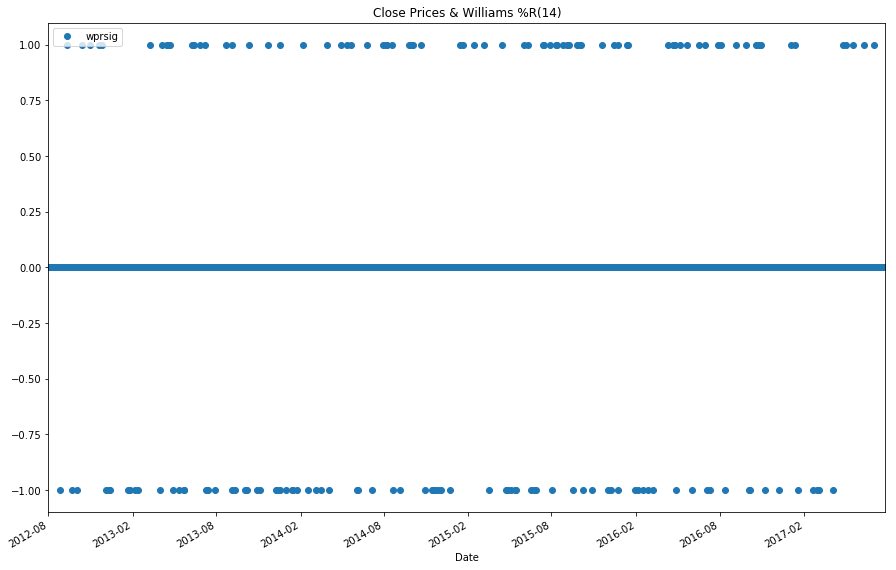

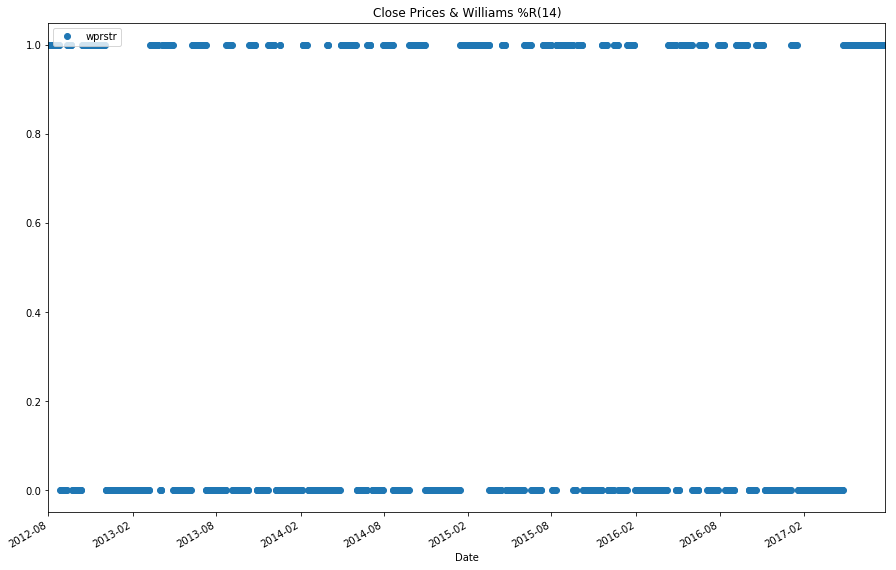

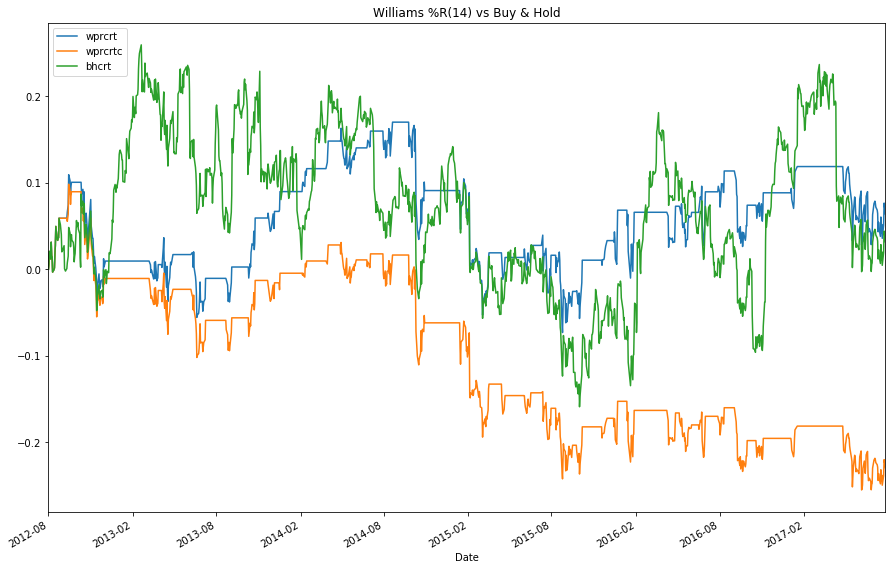

                                 0          1         2          3
0                                      %R(14)  %R(14)TC        B&H
1                Annualized Return  0.0635959 -0.229748  0.0315017
2    Annualized Standard Deviation   0.147849  0.151375   0.236869
3  Annualized Sharpe Ratio (Rf=0%)    0.43014  -1.51774   0.132992


In [38]:
# William %R Trading Signal
stock['wprsig'] = 0
wprsig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['wpr(-2)'] < -80 and r[1]['wpr(-1)'] > -80:
        wprsig = 1
    elif r[1]['wpr(-2)'] < -20 and r[1]['wpr(-1)'] > -20:
        wprsig = -1
    else:
        wprsig = 0
    stock.ix[i, 'wprsig'] = wprsig
    
SinglePlot('Close Prices & Williams %R(14)', ['Close'])
SinglePlot('Close Prices & Williams %R(14)', ['wpr'])
SinglePlotWithMarker('Close Prices & Williams %R(14)', 'wprsig')
GenerateTradingStrategy('wprstr', 'wprsig')
SinglePlotWithMarker('Close Prices & Williams %R(14)', 'wprstr')
PriceCrossoverWithoutTradingCommisions('wprdrt', 'wprstr')
PriceCrossoverWithTradingCommition('wprstr(-1)', 'wprstr', 'wprdrtc', 'wprsig', 'wprtc')
CumulativeReturns('wprcrt', 'wprcrtc', 'bhcrt', 'wprdrt', 'wprdrtc', 'bhdrt', 'Williams %R(14) vs Buy & Hold')
StrategiesPerformanceMetrics('wprcrt', 'wprcrtc', 'bhcrt', 'wprdrt', 'wprdrtc', 'bhdrt', '%R(14)', '%R(14)TC', 'B&H')


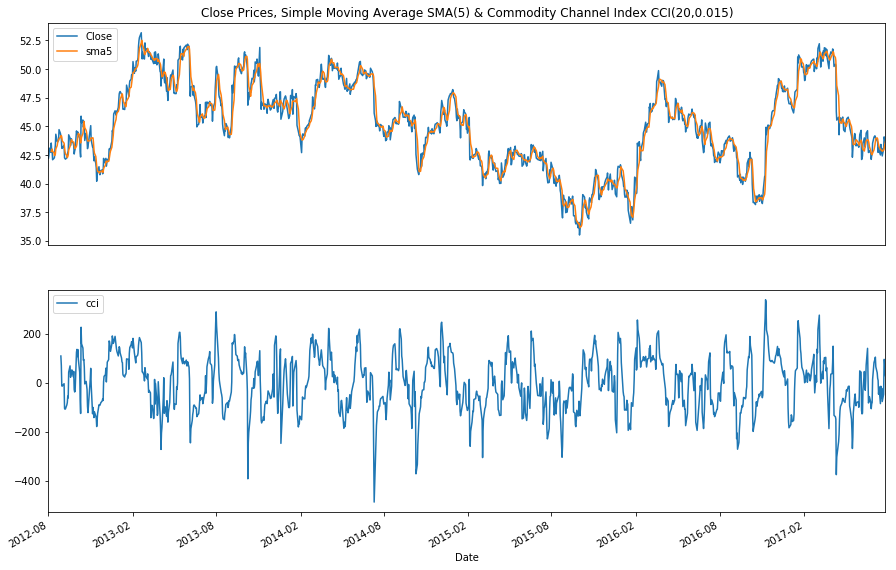

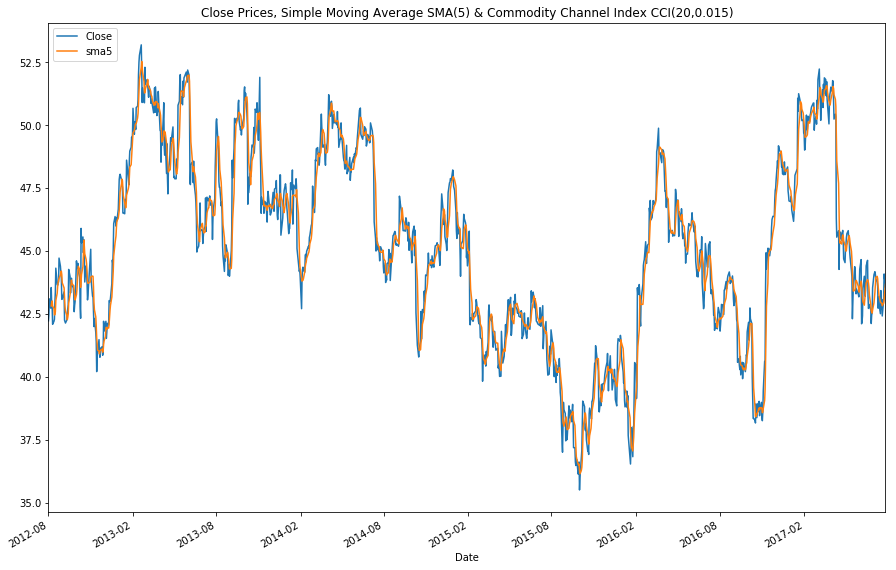

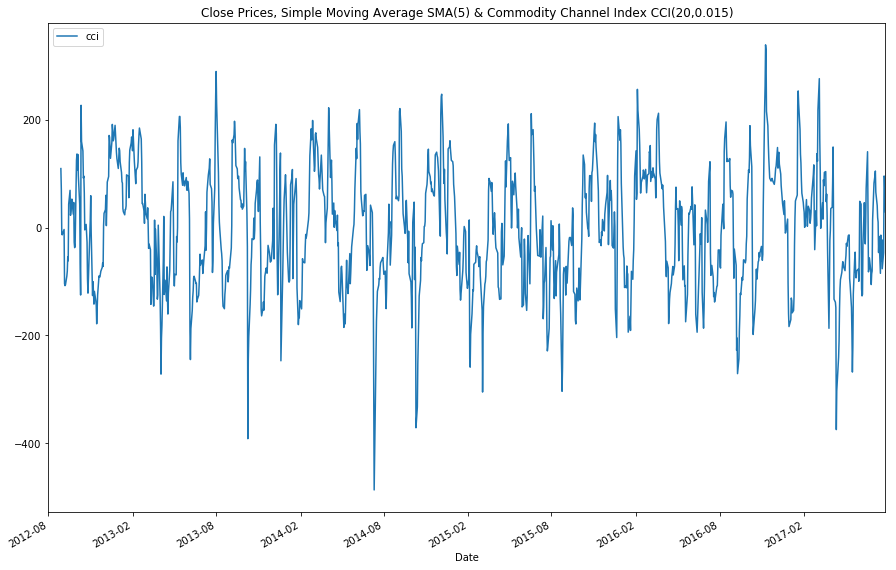

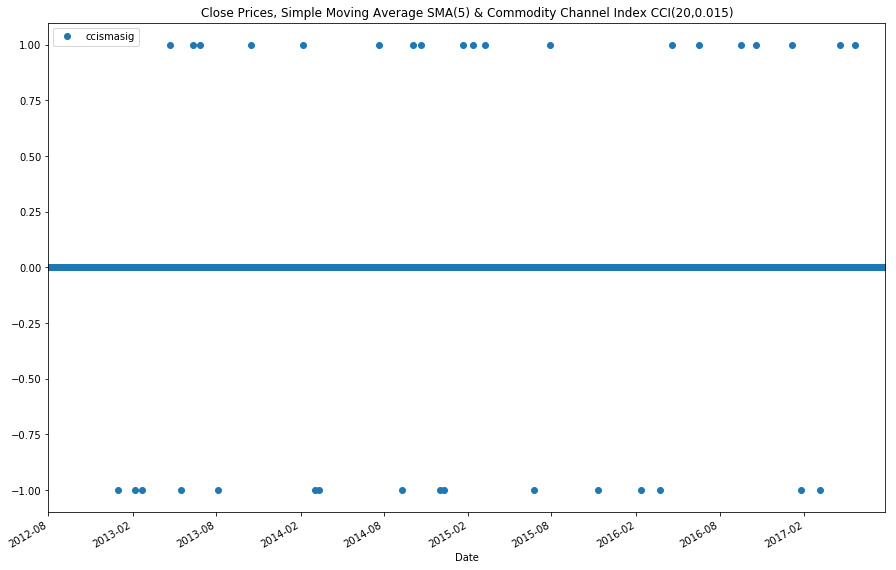

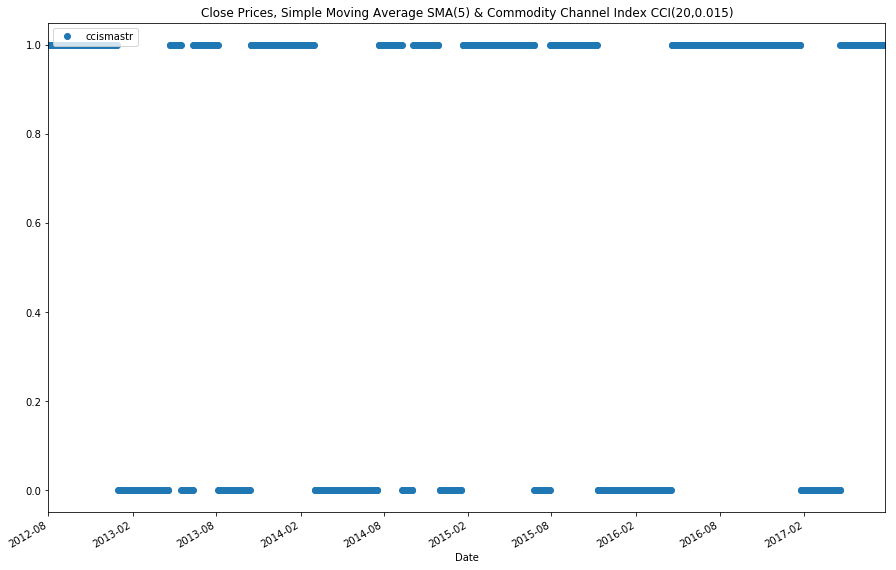

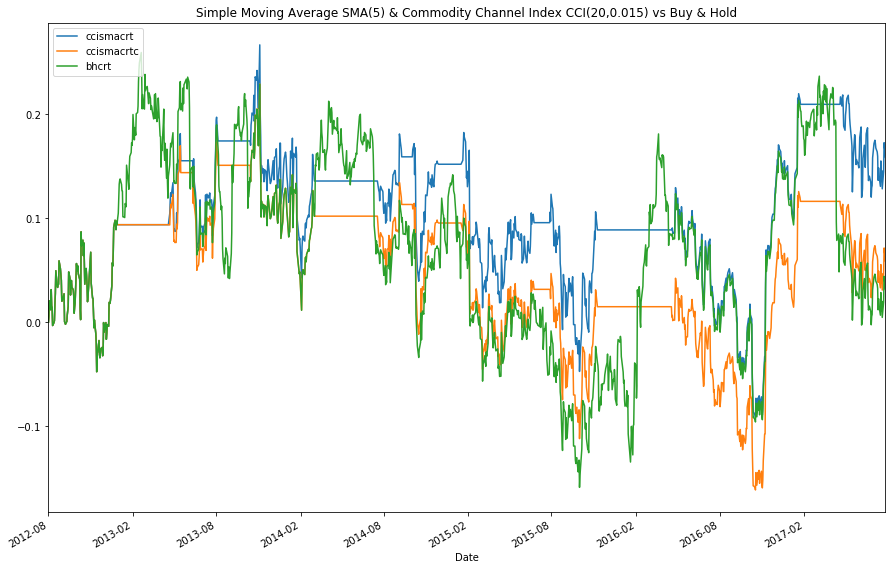

                                 0              1                2          3
0                                   CCI(20,0.015)  CCI(20,0.015)TC        B&H
1                Annualized Return       0.158635         0.058505  0.0315017
2    Annualized Standard Deviation       0.183129         0.183555   0.236869
3  Annualized Sharpe Ratio (Rf=0%)       0.866247         0.318732   0.132992


In [39]:
# SMA(5) and CCI(20,0.015)
stock['ccismasig'] = 0
ccismasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['cci(-1)'] < -100:
        ccismasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['cci(-1)'] > 100:
        ccismasig = -1
    else:
        ccismasig = 0
    stock.ix[i, 'ccismasig'] = ccismasig

SeparatePlot2('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', ['Close', 'sma5'], ['cci'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', ['Close', 'sma5'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', ['cci'])
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', ['ccismasig'])
GenerateTradingStrategy('ccismastr', 'ccismasig')
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)', 'ccismastr')
PriceCrossoverWithoutTradingCommisions('ccismadrt', 'ccismastr')
PriceCrossoverWithTradingCommition('ccismastr(-1)', 'ccismastr', 'ccismadrtc', 'ccismasig', 'ccismatc')
CumulativeReturns('ccismacrt', 'ccismacrtc', 'bhcrt', 'ccismadrt', 'ccismadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015) vs Buy & Hold')
StrategiesPerformanceMetrics('ccismacrt', 'ccismacrtc', 'bhcrt', 'ccismadrt', 'ccismadrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')

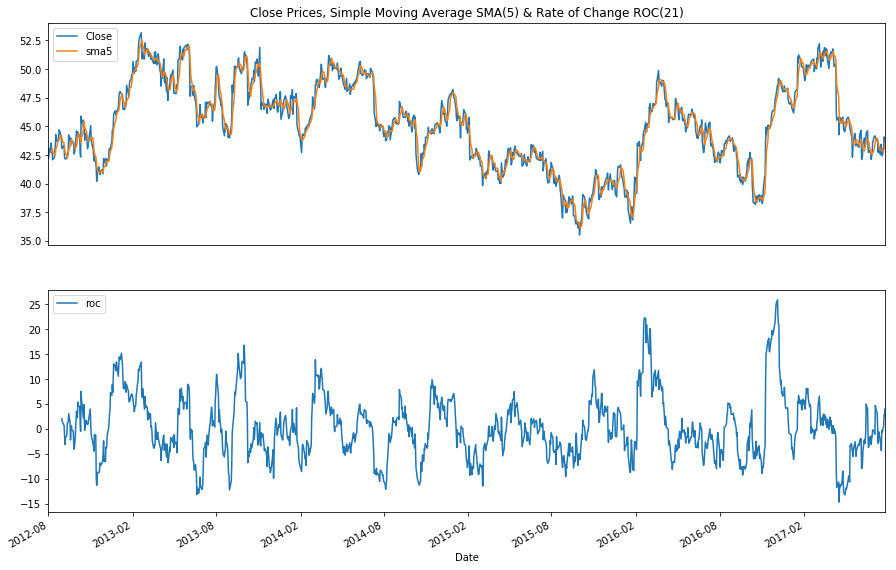

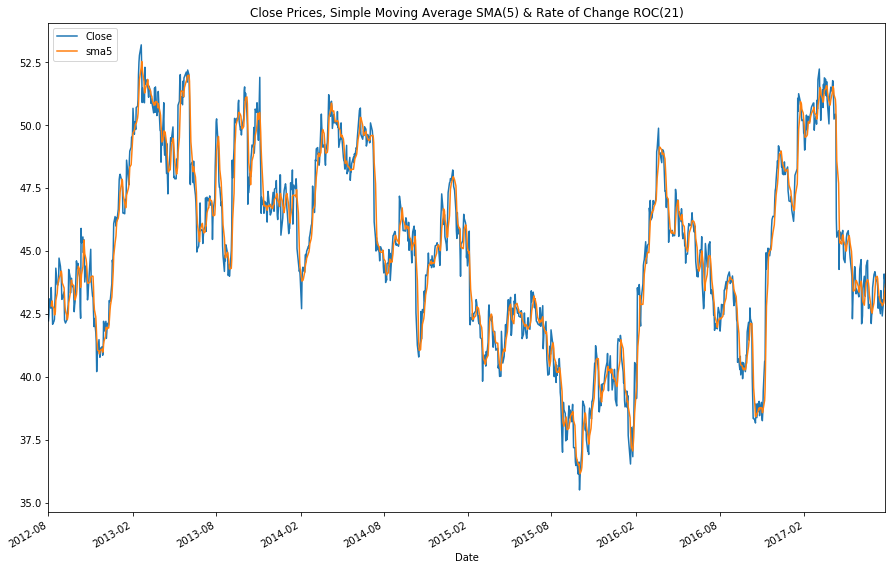

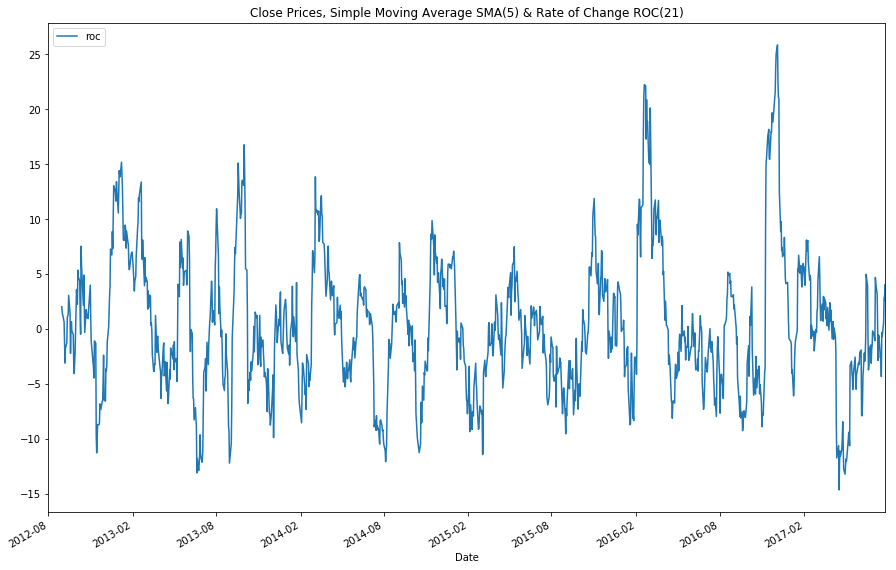

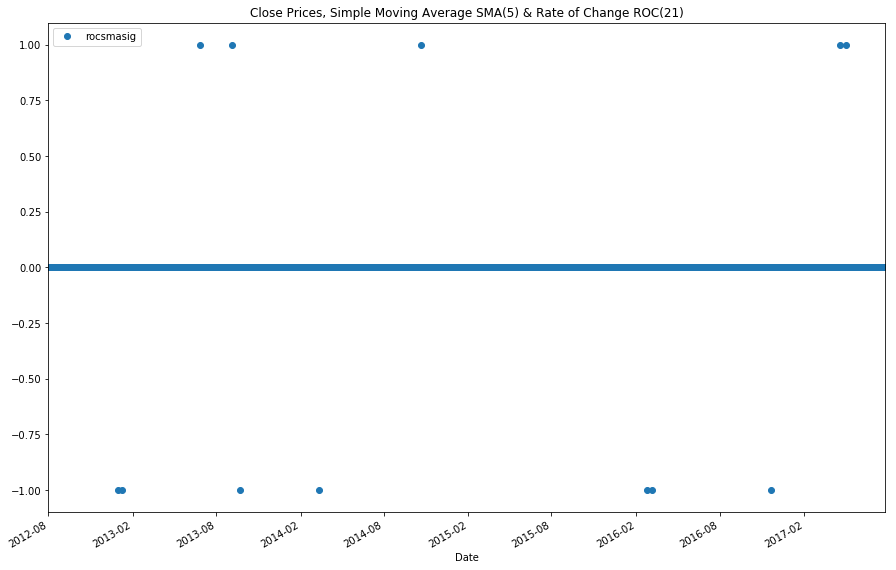

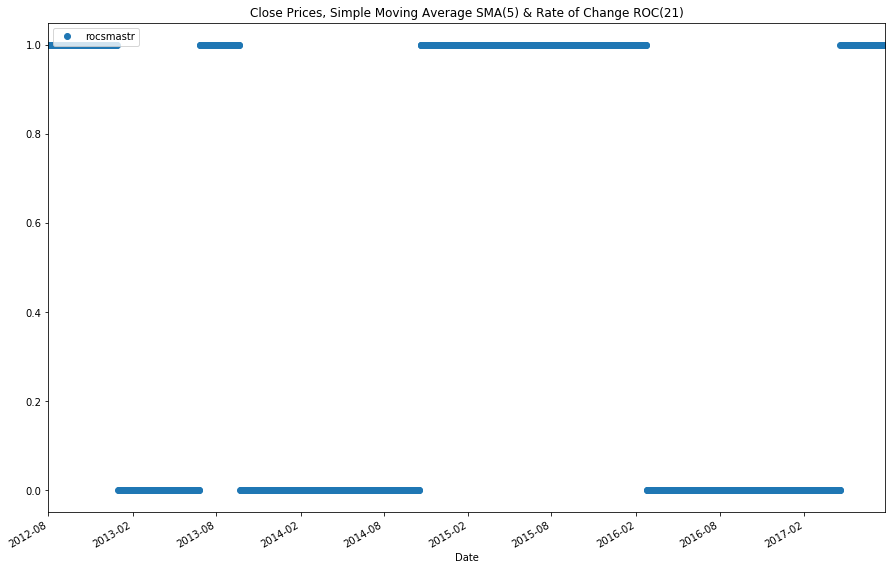

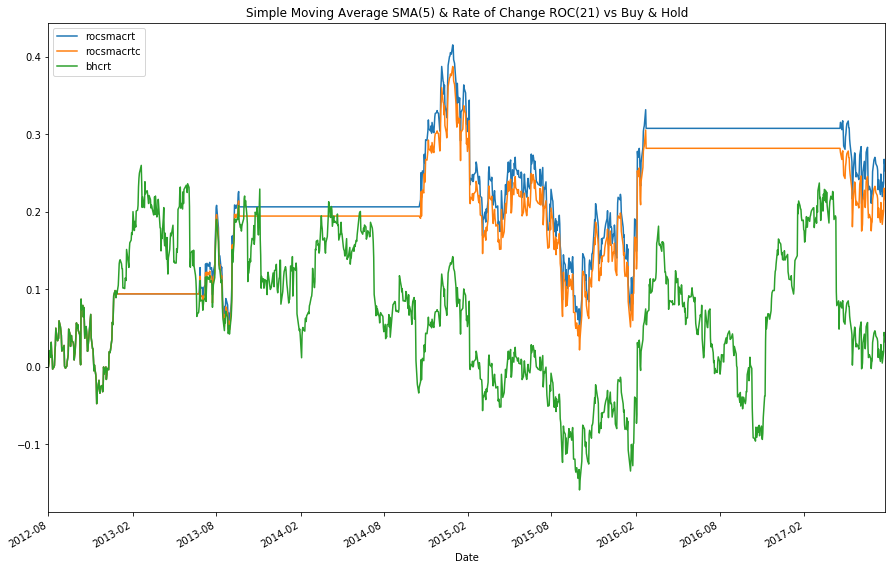

                                 0         1         2          3
0                                        ---     ---TC        B&H
1                Annualized Return  0.252145  0.215282  0.0315017
2    Annualized Standard Deviation   0.16659  0.166455   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   1.51357   1.29333   0.132992


In [40]:
# SMA(5) and ROC(21)
stock['rocsmasig'] = 0
rocsmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['roc(-1)'] < -10:
        rocsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['roc(-1)'] > 10:
        rocsmasig = -1
    else:
        rocsmasig = 0
    stock.ix[i, 'rocsmasig'] = rocsmasig
    
SeparatePlot2('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', ['Close', 'sma5'], ['roc'])

SinglePlot('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', ['Close', 'sma5'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', ['roc'])
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', ['rocsmasig'])
GenerateTradingStrategy('rocsmastr', 'rocsmasig')
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)', 'rocsmastr')
PriceCrossoverWithoutTradingCommisions('rocsmadrt', 'rocsmastr')
PriceCrossoverWithTradingCommition('rocsmastr(-1)', 'rocsmastr', 'rocsmadrtc', 'rocsmasig', 'rocsmatc')
CumulativeReturns('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')
StrategiesPerformanceMetrics('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', '---', '---TC', 'B&H')


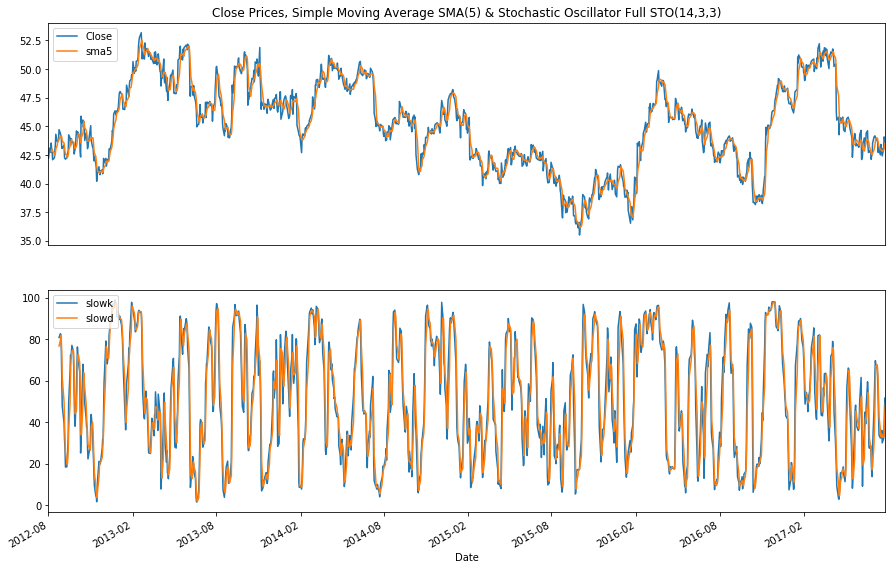

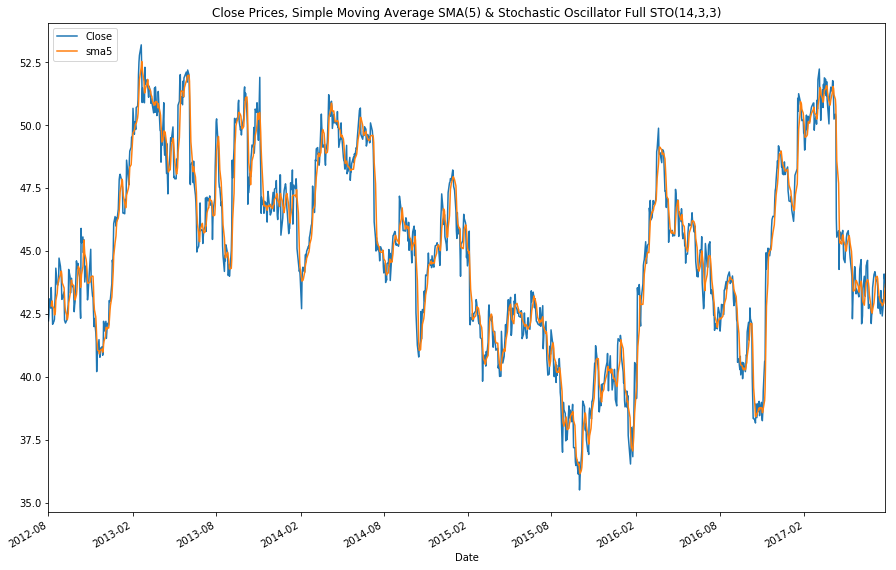

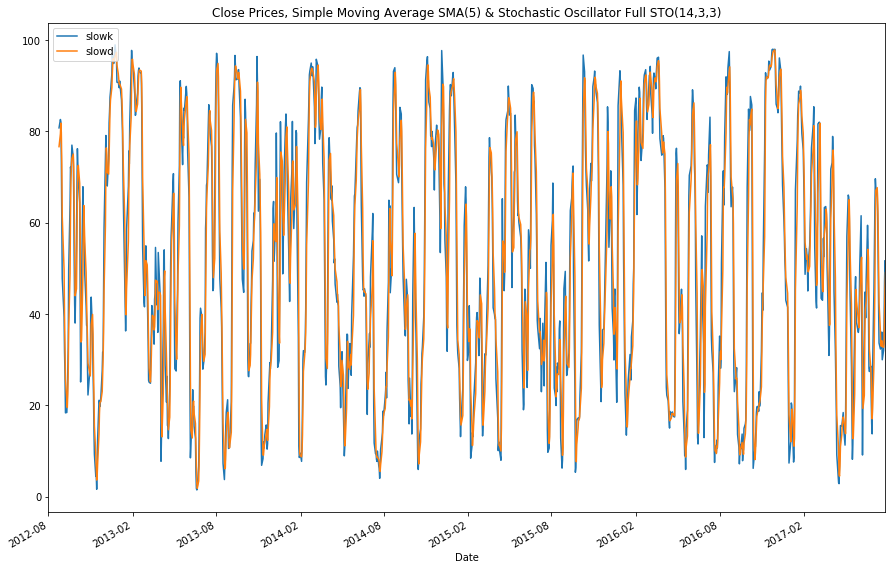

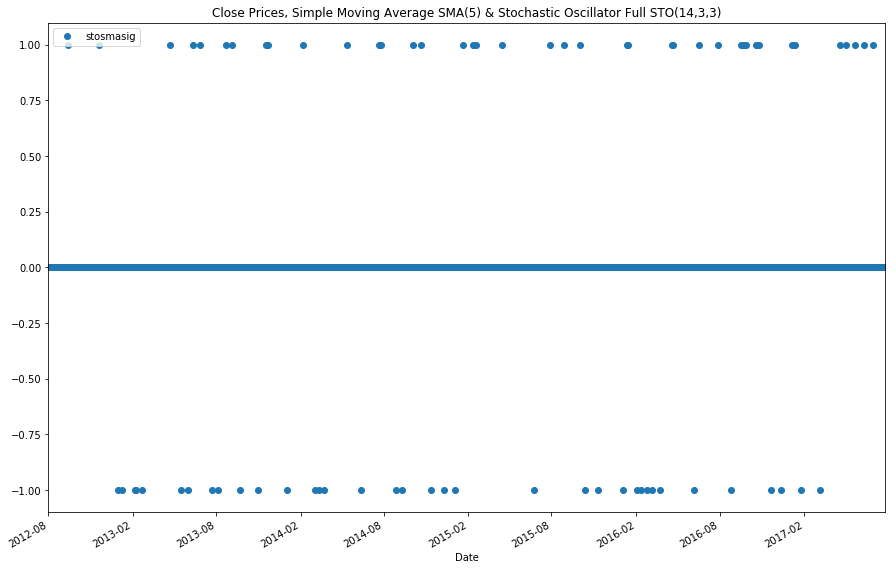

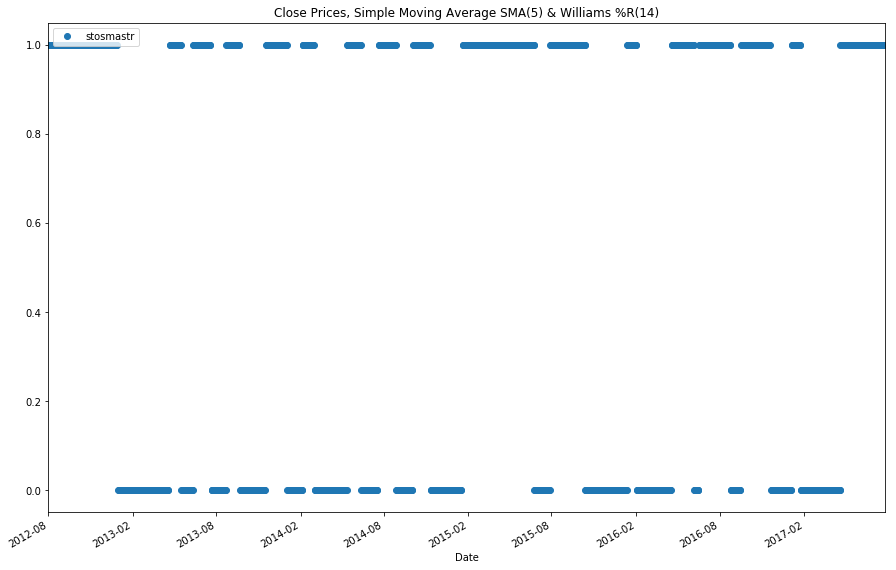

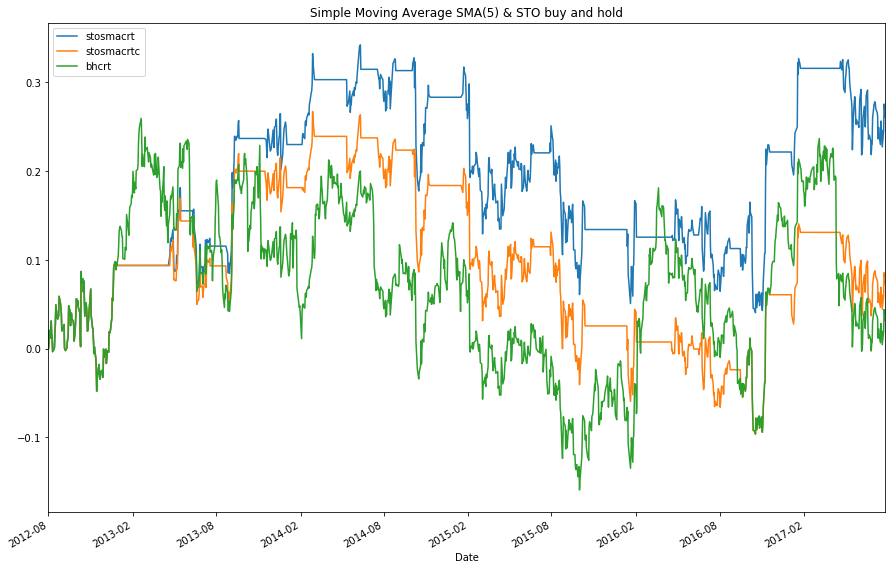

                                 0         1          2          3
0                                        ---      ---TC        B&H
1                Annualized Return  0.260334  0.0725598  0.0315017
2    Annualized Standard Deviation  0.174246   0.175768   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   1.49406   0.412817   0.132992


In [41]:
# SMA(5) and STO(14,3,3)
stock['stosmasig'] = 0
stosmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['slowd(-1)'] < 20:
        stosmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['slowd(-1)'] > 80:
        stosmasig = -1
    else:
        stosmasig = 0
    stock.ix[i, 'stosmasig'] = stosmasig
    
SeparatePlot2('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)', ['Close', 'sma5'], ['slowk', 'slowd'])

SinglePlot('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)', ['Close', 'sma5'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)', ['slowk', 'slowd'])
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)', ['stosmasig'])
GenerateTradingStrategy('stosmastr', 'stosmasig')
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', 'stosmastr')
PriceCrossoverWithoutTradingCommisions('stosmadrt', 'stosmastr')
PriceCrossoverWithTradingCommition('stosmastr(-1)', 'stosmastr', 'stosmadrtc', 'stosmasig', 'stosmatc')
CumulativeReturns('stosmacrt', 'stosmacrtc', 'bhcrt', 'stosmadrt', 'stosmadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & STO buy and hold')
StrategiesPerformanceMetrics('stosmacrt', 'stosmacrtc', 'bhcrt', 'stosmadrt', 'stosmadrtc', 'bhdrt', '---', '---TC', 'B&H')


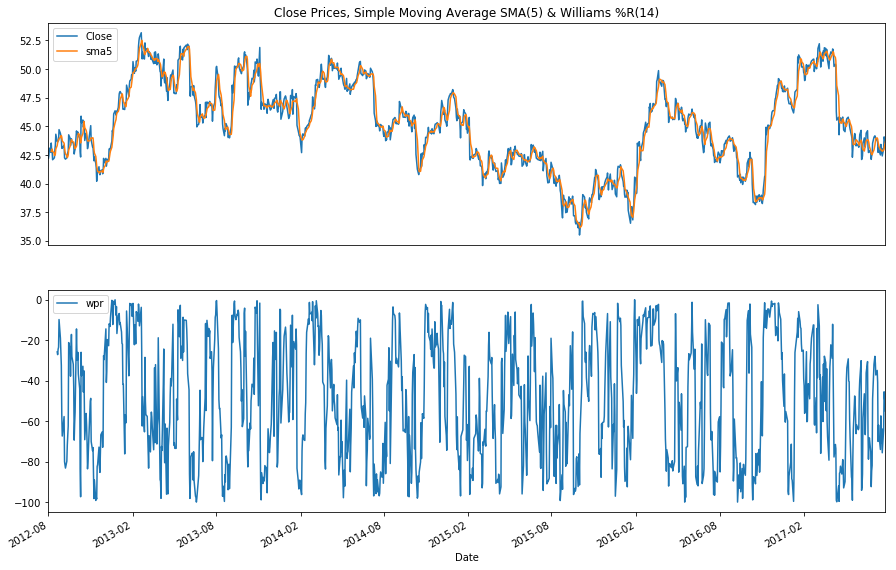

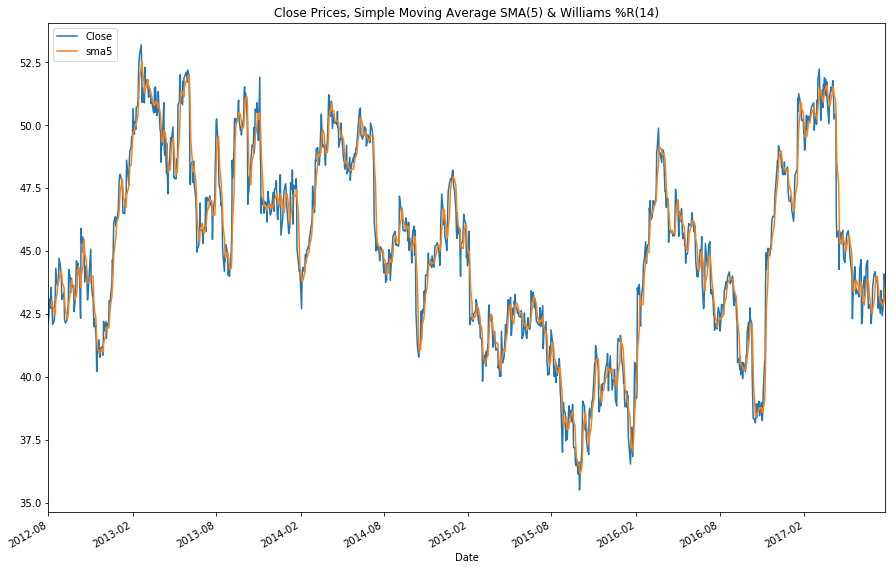

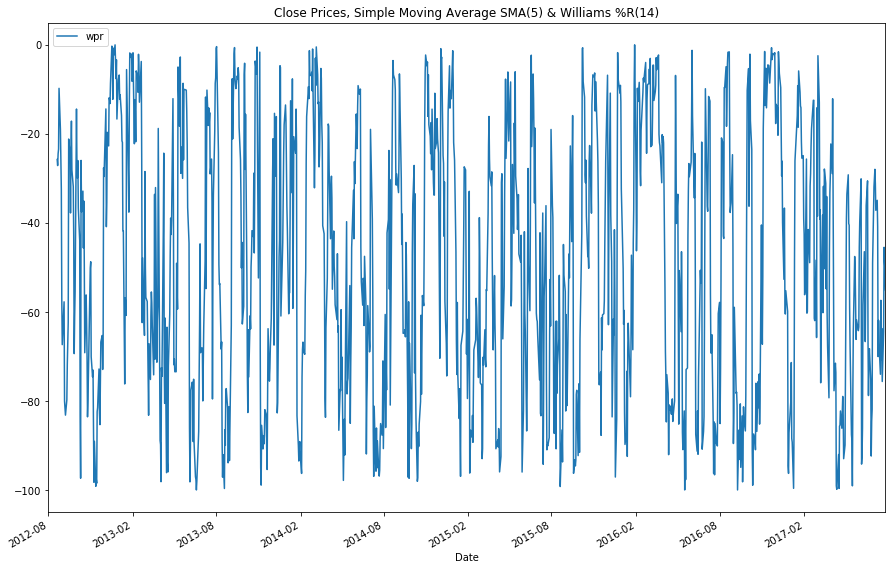

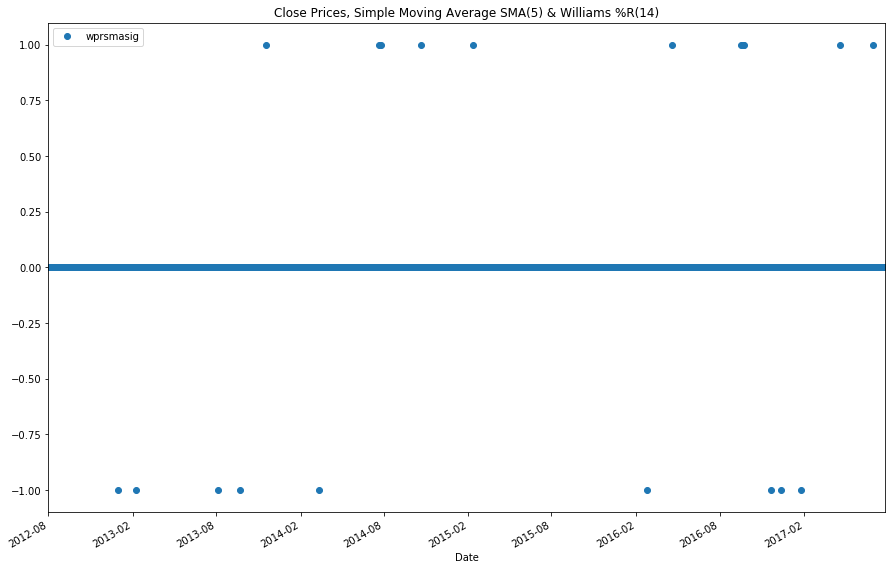

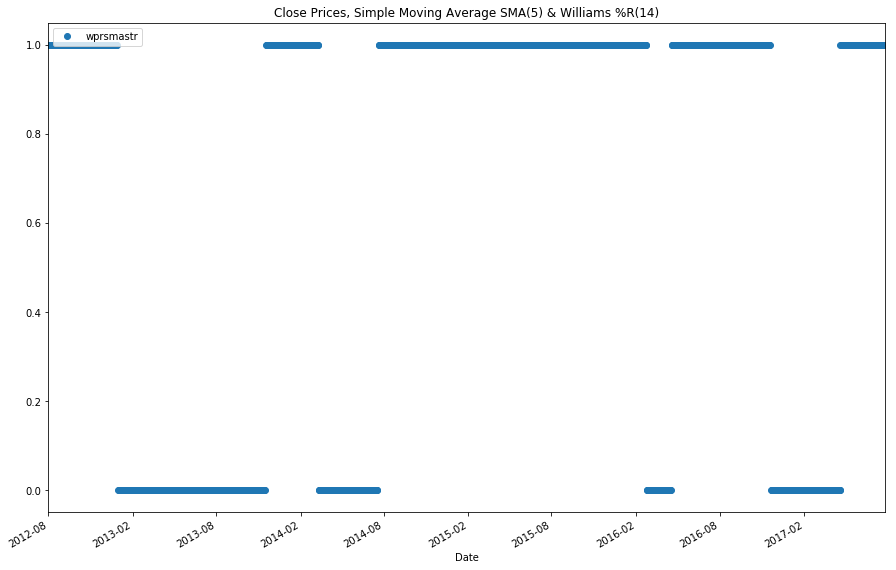

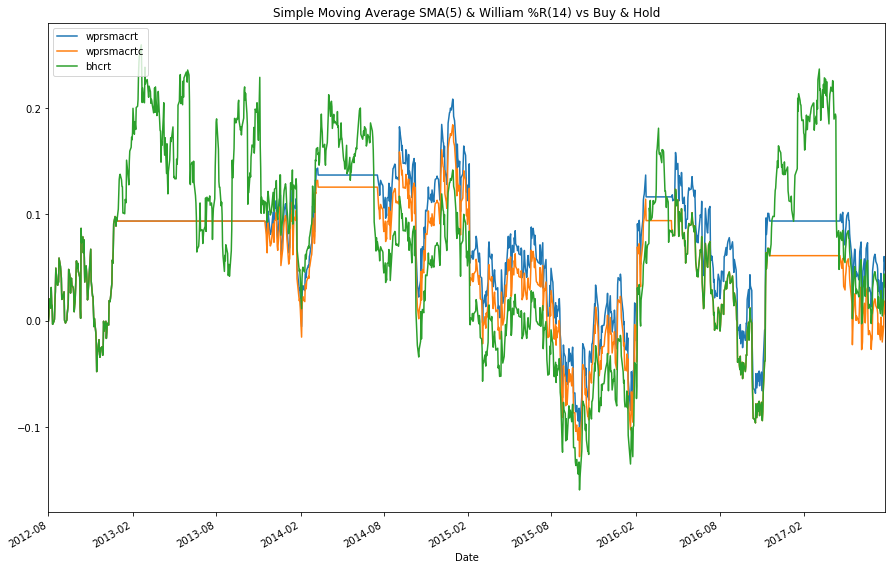

                                 0          1           2          3
0                                         ---       ---TC        B&H
1                Annualized Return  0.0476653  0.00634886  0.0315017
2    Annualized Standard Deviation   0.191446    0.191694   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   0.248975   0.0331198   0.132992


In [42]:
# SMA(5) and Williams %R(14)
stock['wprsmasig'] = 0
wprsmasig = 0
for i, r in enumerate(stock.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['wpr(-1)'] < -80:
        wprsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['wpr(-1)'] > -20:
        wprsmasig = -1
    else:
        wprsmasig = 0
    stock.ix[i, 'wprsmasig'] = wprsmasig    
    
SeparatePlot2('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', ['Close', 'sma5'], ['wpr'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', ['Close', 'sma5'])
SinglePlot('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', ['wpr'])
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', ['wprsmasig'])
GenerateTradingStrategy('wprsmastr', 'wprsmasig')
SinglePlotWithMarker('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)', 'wprsmastr')
PriceCrossoverWithoutTradingCommisions('wprsmadrt', 'wprsmastr')
PriceCrossoverWithTradingCommition('wprsmastr(-1)', 'wprsmastr', 'wprsmadrtc', 'wprsmasig', 'wprsmatc')
CumulativeReturns('wprsmacrt', 'wprsmacrtc', 'bhcrt', 'wprsmadrt', 'wprsmadrtc', 'bhdrt', 'Simple Moving Average SMA(5) & William %R(14) vs Buy & Hold')
StrategiesPerformanceMetrics('wprsmacrt', 'wprsmacrtc', 'bhcrt', 'wprsmadrt', 'wprsmadrtc', 'bhdrt', '---', '---TC', 'B&H')


In [43]:
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'SMA(5)', 'SMA(5)TC', 'B&H')
StrategiesPerformanceMetrics('emacrt', 'emacrtc', 'bhcrt', 'emadrt', 'emadrtc', 'bhdrt', 'EMA(5 & 21)', 'EMA(5 & 21)TC', 'B&H')
StrategiesPerformanceMetrics('bbcrt', 'bbcrtc', 'bhcrt', 'bbdrt', 'bbdrtc', 'bhdrt', 'BB(20,2)', 'BB(20,2)TC', 'B&H')
StrategiesPerformanceMetrics('sarcrt', 'sarcrtc', 'bhcrt', 'sardrt', 'sardrtc', 'bhdrt', 'SAR(0.02,0.2)', 'SAR(0.02,0.2)TC', 'B&H')
StrategiesPerformanceMetrics('adxcrt', 'adxcrtc', 'bhcrt', 'adxdrt', 'adxdrtc', 'bhdrt', 'ADX(14)', 'ADX(14)TC', 'B&H')
StrategiesPerformanceMetrics('ccicrt', 'ccicrtc', 'bhcrt', 'ccidrt', 'ccidrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')
StrategiesPerformanceMetrics('macdcrt', 'macdcrtc', 'bhcrt', 'macddrt', 'macddrtc', 'bhdrt', 'MACD(12,26,9)', 'MACD(12,26,9)TC', 'B&H')
StrategiesPerformanceMetrics('sma5crt', 'sma5crtc', 'bhcrt', 'sma5drt', 'sma5drtc', 'bhdrt', 'ROC(21)', 'ROC(21)TC', 'B&H')
StrategiesPerformanceMetrics('rsicrt', 'rsicrtc', 'bhcrt', 'rsidrt', 'rsidrtc', 'bhdrt', 'RSI(14)', 'RSI(14)TC', 'B&H')
StrategiesPerformanceMetrics('stocrt', 'stocrtc', 'bhcrt', 'stodrt', 'stodrtc', 'bhdrt', 'STO(14,3,3)', 'STO(14,3,3)TC', 'B&H')
StrategiesPerformanceMetrics('wprcrt', 'wprcrtc', 'bhcrt', 'wprdrt', 'wprdrtc', 'bhdrt', '%R(14)', '%R(14)TC', 'B&H')
StrategiesPerformanceMetrics('ccismacrt', 'ccismacrtc', 'bhcrt', 'ccismadrt', 'ccismadrtc', 'bhdrt', 'CCI(20,0.015)', 'CCI(20,0.015)TC', 'B&H')
StrategiesPerformanceMetrics('rocsmacrt', 'rocsmacrtc', 'bhcrt', 'rocsmadrt', 'rocsmadrtc', 'bhdrt', '---', '---TC', 'B&H')
StrategiesPerformanceMetrics('stosmacrt', 'stosmacrtc', 'bhcrt', 'stosmadrt', 'stosmadrtc', 'bhdrt', '---', '---TC', 'B&H')
StrategiesPerformanceMetrics('wprsmacrt', 'wprsmacrtc', 'bhcrt', 'wprsmadrt', 'wprsmadrtc', 'bhdrt', '---', '---TC', 'B&H')


                                 0         1         2          3
0                                     SMA(5)  SMA(5)TC        B&H
1                Annualized Return -0.238763 -0.852412  0.0315017
2    Annualized Standard Deviation  0.164982  0.175362   0.236869
3  Annualized Sharpe Ratio (Rf=0%)   -1.4472  -4.86087   0.132992
                                 0            1              2          3
0                                   EMA(5 & 21)  EMA(5 & 21)TC        B&H
1                Annualized Return    -0.366022      -0.597393  0.0315017
2    Annualized Standard Deviation     0.158435       0.163086   0.236869
3  Annualized Sharpe Ratio (Rf=0%)     -2.31023       -3.66306   0.132992
                                 0         1           2          3
0                                   BB(20,2)  BB(20,2)TC        B&H
1                Annualized Return  0.762116    0.456877  0.0315017
2    Annualized Standard Deviation  0.171735    0.172065   0.236869
3  Annualized Sharpe Ratio (

In [44]:
stock['macdsig'][-10:]

Date
2017-07-17    0
2017-07-18   -1
2017-07-19    0
2017-07-20    0
2017-07-21    0
2017-07-24    0
2017-07-25    0
2017-07-26    1
2017-07-27    0
2017-07-28    0
Name: macdsig, dtype: int64

In [45]:
stock['macdstr'][-10:]

Date
2017-07-17    1
2017-07-18    0
2017-07-19    0
2017-07-20    0
2017-07-21    0
2017-07-24    0
2017-07-25    0
2017-07-26    1
2017-07-27    1
2017-07-28    1
Name: macdstr, dtype: int64

In [46]:
strategy_columns = [col for col in stock.columns if 'str' in col and '(-1)' not in col]
print(strategy_columns)

['sma5str', 'emastr', 'bbstr', 'sarstr', 'adxstr', 'ccistr', 'macdstr', 'rocstr', 'rsistr', 'stostr', 'wprstr', 'ccismastr', 'rocsmastr', 'stosmastr', 'wprsmastr']


In [47]:
pd_strategies = stock[strategy_columns]
pd_now = stock[['sarstr', 'macdstr', 'stosmastr', 'adxstr', 'rsistr']]
pd_geo = stock[['adxstr', 'wprsmastr', 'emastr']]
pd_zdpy = stock[['adxstr', 'rsistr', 'emastr']]
pd_cara = stock[['sma5str', 'rocstr', 'sarstr']]
pd_gwph = stock[['rocstr', 'sma5str', 'adxstr']]

In [48]:
pd_now.tail(5)

sarstr  macdstr  stosmastr  adxstr  rsistr
Date                                                  
2017-07-24       0        0          1       1       1
2017-07-25       0        0          1       1       1
2017-07-26       0        1          1       1       1
2017-07-27       0        1          1       1       1
2017-07-28       0        1          1       1       1

In [49]:
pd_now.mode(axis=1).tail(5)

0
Date         
2017-07-24  1
2017-07-25  1
2017-07-26  1
2017-07-27  1
2017-07-28  1

In [50]:
pd_geo.mode(axis=1).tail(5)

0
Date         
2017-07-24  1
2017-07-25  1
2017-07-26  1
2017-07-27  1
2017-07-28  1

In [51]:
pd_geo.tail(10)

adxstr  wprsmastr  emastr
Date                                 
2017-07-17       1          1       0
2017-07-18       1          1       0
2017-07-19       1          1       0
2017-07-20       1          1       0
2017-07-21       1          1       0
2017-07-24       1          1       0
2017-07-25       1          1       0
2017-07-26       1          1       1
2017-07-27       1          1       1
2017-07-28       1          1       1

In [52]:
pd_zdpy.mode(axis=1).tail(5)

0
Date         
2017-07-24  1
2017-07-25  1
2017-07-26  1
2017-07-27  1
2017-07-28  1

In [53]:
pd_cara.mode(axis=1).tail(5)

0
Date         
2017-07-24  0
2017-07-25  1
2017-07-26  1
2017-07-27  1
2017-07-28  1

In [54]:
pd_gwph.mode(axis=1).tail(5)

0
Date         
2017-07-24  1
2017-07-25  1
2017-07-26  1
2017-07-27  1
2017-07-28  1